In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("DATA_CARS.csv")
df.head()

,Brand,Model,Varient,Year,driven kilometers,fuel,number of owners,location,Price,Site
0,Mahindra,Xylo,E8,2011,161779,Diesel,First Owner,Ahemdabad,141000,www.cardekho.com
1,Hyundai,i20,Active1.4SX,2015,60603,Diesel,First Owner,Ahemdabad,490000,www.cardekho.com
2,Maruti,Swift,DzireZDi,2012,195642,Diesel,Second Owner,Ahemdabad,250000,www.cardekho.com
3,Hyundai,i20,1.4CRDiSportz,2012,145814,Diesel,First Owner,Ahemdabad,236000,www.cardekho.com
4,Tata,Vista,TDILS,2013,226130,Diesel,First Owner,Ahemdabad,70000,www.cardekho.com


In [3]:
#Lets check the data Types- we can see that almost all the data into object. we have to convert this into integer to further processing
df.shape

(6824, 10)

In [4]:
df.dtypes

Brand                object
Model                object
Varient              object
Year                  int64
driven kilometers     int64
fuel                 object
number of owners     object
location             object
Price                 int64
Site                 object
dtype: object

In [5]:
#Cheking the columns 
df.columns

Index(['Brand', 'Model', 'Varient', 'Year', 'driven kilometers', 'fuel',
       'number of owners', 'location', 'Price', 'Site'],
      dtype='object')

In [6]:
#Let's check the unique values
print("Distince values of each columns")
for column in df:
    print(f'-{column}:{df[column].unique()}')

Distince values of each columns
-Brand:['Mahindra' 'Hyundai' 'Maruti' 'Tata' 'Honda' 'Nissan' 'Toyota' 'Ford'
 'Volkswagen' 'Mini' 'Chevrolet' 'Renault' 'Mercedes-Benz' 'Jeep' 'Audi'
 'Volvo' 'BMW' 'Skoda' 'Land' 'Datsun' 'Kia' 'MG' 'Maruti Suzuki'
 'Ssangyong' 'Mitsubishi' 'Mahindra Renault' 'Mg' 'Isuzu' 'Mercedes Benz'
 'Jaguar' 'Fiat' 'Maruti-Suzuki' 'Porsche' 'MINI' 'KIA' 'Landrover'
 'Mercedes' 'HYUNDAI']
-Model:['Xylo' 'i20' 'Swift' 'Vista' 'City' 'Wagon' 'Terrano' 'Baleno' 'Innova'
 'Verna' 'Brio' 'EcoSport' 'Vento' 'Indica' 'Micra' 'XUV500' 'Scorpio'
 'Creta' 'Fortuner' 'Santro' 'Tucson' 'Grand' 'Vitara' 'Harrier' 'Nano'
 'Cooper' 'Ciaz' 'Alto' 'SX4' 'Amaze' 'Enjoy' 'Ertiga' 'Elantra' 'KWID'
 'Endeavour' 'i10' 'E-Class' 'Nexon' 'Tiago' 'Ritz' 'Bolero' 'EON' 'WR-V'
 'Cruze' 'Etios' 'Compass' 'Polo' 'Sunny' 'New' 'Xcent' 'WagonR'
 'Swift Dzire' 'Eeco' 'S-Presso' 'Jazz' 'Grand i10' 'A4' 'Ignis'
 'EtiosLiva' 'Ameo' 'A6' 'Q5' 'Alto 800' 'S60CrossCountry' 'AltoK10' 'Q2'
 'Glanza' 'Mi

In [7]:
#Checking the unique values
df.nunique()

Brand                  38
Model                 541
Varient              1863
Year                   21
driven kilometers    4263
fuel                   13
number of owners        4
location               43
Price                2637
Site                    4
dtype: int64

In [8]:
#Checking the null value-No null value found 
df.isnull().sum()

Brand                0
Model                0
Varient              0
Year                 0
driven kilometers    0
fuel                 0
number of owners     0
location             0
Price                0
Site                 0
dtype: int64

<AxesSubplot:>

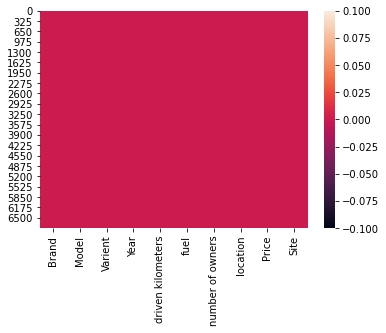

In [9]:
sns.heatmap(df.isnull())

In [10]:
#Describing Data
df.describe()

,Year,driven kilometers,Price
count,6824.000000,6824.000000,6.824000e+03
mean,2015.823271,48840.567556,6.479283e+05
std,2.722251,32920.909201,6.265008e+05
min,1999.000000,1.000000,5.500000e+04
25%,2014.000000,24317.000000,3.760990e+05
50%,2016.000000,43308.000000,5.100000e+05
75%,2018.000000,67510.000000,6.990000e+05
max,2021.000000,394508.000000,9.975000e+06


In [11]:
#Checking the unique values of the brand columns
df.Brand.unique()

array(['Mahindra', 'Hyundai', 'Maruti', 'Tata', 'Honda', 'Nissan',
       'Toyota', 'Ford', 'Volkswagen', 'Mini', 'Chevrolet', 'Renault',
       'Mercedes-Benz', 'Jeep', 'Audi', 'Volvo', 'BMW', 'Skoda', 'Land',
       'Datsun', 'Kia', 'MG', 'Maruti Suzuki', 'Ssangyong', 'Mitsubishi',
       'Mahindra Renault', 'Mg', 'Isuzu', 'Mercedes Benz', 'Jaguar',
       'Fiat', 'Maruti-Suzuki', 'Porsche', 'MINI', 'KIA', 'Landrover',
       'Mercedes', 'HYUNDAI'], dtype=object)

In [12]:
df.Brand = df.Brand.str.lower()
df.Brand.unique()

array(['mahindra', 'hyundai', 'maruti', 'tata', 'honda', 'nissan',
       'toyota', 'ford', 'volkswagen', 'mini', 'chevrolet', 'renault',
       'mercedes-benz', 'jeep', 'audi', 'volvo', 'bmw', 'skoda', 'land',
       'datsun', 'kia', 'mg', 'maruti suzuki', 'ssangyong', 'mitsubishi',
       'mahindra renault', 'isuzu', 'mercedes benz', 'jaguar', 'fiat',
       'maruti-suzuki', 'porsche', 'landrover', 'mercedes'], dtype=object)

In [13]:
#Correcting and replacing the wrong names with the correct ones
def replace_name(a,b):
    df.Brand.replace(a,b,inplace=True)

replace_name('mercedes benz','mercedes-benz')
replace_name('land','land-rover')
replace_name('landrover','land-rover')
replace_name('mercedes','mercedes-benz')

df.Brand.unique()

array(['mahindra', 'hyundai', 'maruti', 'tata', 'honda', 'nissan',
       'toyota', 'ford', 'volkswagen', 'mini', 'chevrolet', 'renault',
       'mercedes-benz', 'jeep', 'audi', 'volvo', 'bmw', 'skoda',
       'land-rover', 'datsun', 'kia', 'mg', 'maruti suzuki', 'ssangyong',
       'mitsubishi', 'mahindra renault', 'isuzu', 'jaguar', 'fiat',
       'maruti-suzuki', 'porsche'], dtype=object)

In [14]:
#Converting the objects in the Brand columns into upper case 
df.Brand = df.Brand.str.upper()
df.Brand.unique()

array(['MAHINDRA', 'HYUNDAI', 'MARUTI', 'TATA', 'HONDA', 'NISSAN',
       'TOYOTA', 'FORD', 'VOLKSWAGEN', 'MINI', 'CHEVROLET', 'RENAULT',
       'MERCEDES-BENZ', 'JEEP', 'AUDI', 'VOLVO', 'BMW', 'SKODA',
       'LAND-ROVER', 'DATSUN', 'KIA', 'MG', 'MARUTI SUZUKI', 'SSANGYONG',
       'MITSUBISHI', 'MAHINDRA RENAULT', 'ISUZU', 'JAGUAR', 'FIAT',
       'MARUTI-SUZUKI', 'PORSCHE'], dtype=object)

# Visualizing the data

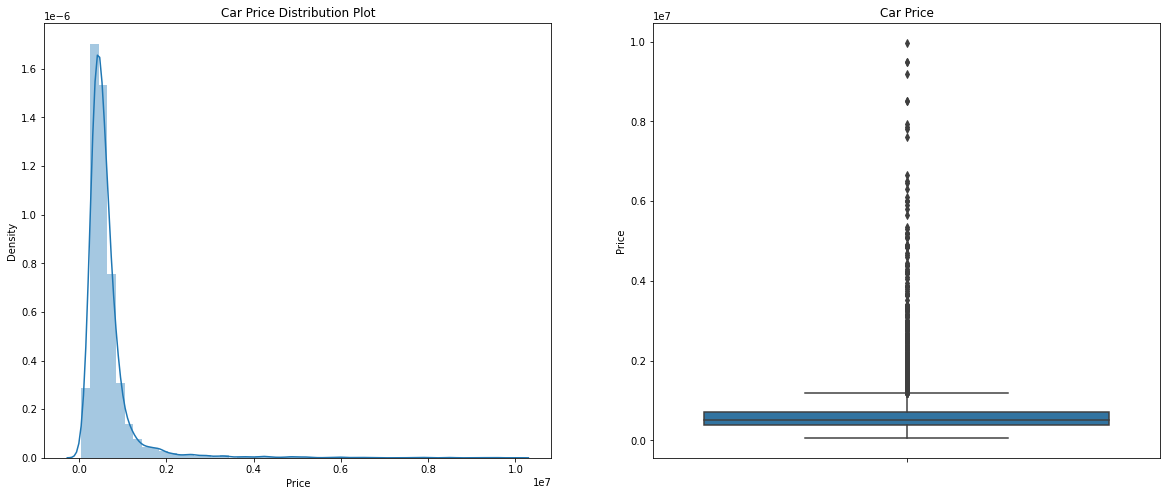

In [15]:
#Checking the skewness and the outliers in the Car columns
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df.Price)

plt.subplot(1,2,2)
plt.title('Car Price')
sns.boxplot(y=df.Price)

plt.show()

In [16]:
print(df.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    6.824000e+03
mean     6.479283e+05
std      6.265008e+05
min      5.500000e+04
25%      3.760990e+05
50%      5.100000e+05
75%      6.990000e+05
85%      8.498990e+05
90%      9.859093e+05
100%     9.975000e+06
max      9.975000e+06
Name: Price, dtype: float64


<Figure size 2880x2160 with 0 Axes>

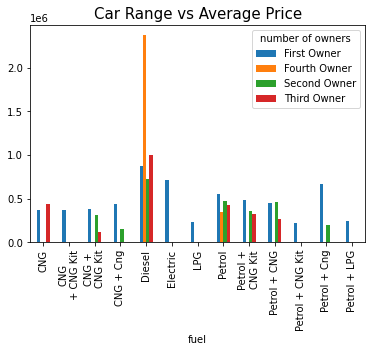

In [17]:
plt.figure(figsize=(40,30))
df10= pd.DataFrame(df.groupby(['fuel','number of owners'])['Price'].mean().unstack(fill_value=0))
df10.plot.bar()
plt.xticks(fontsize=10)
plt.title('Car Range vs Average Price',fontsize=15)
plt.show()

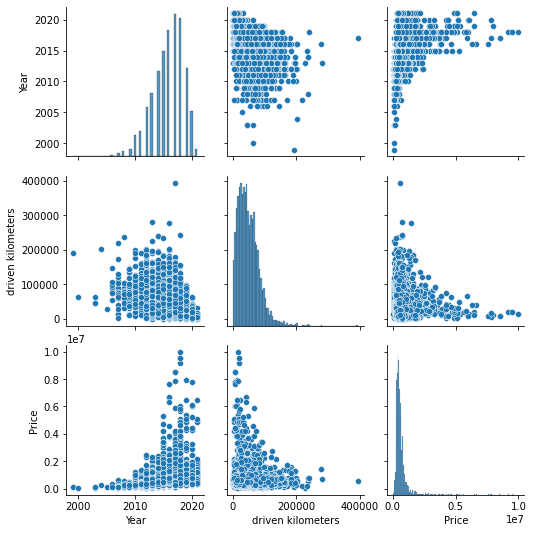

In [18]:
sns.pairplot(df)
plt.show()

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'driven kilometers'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

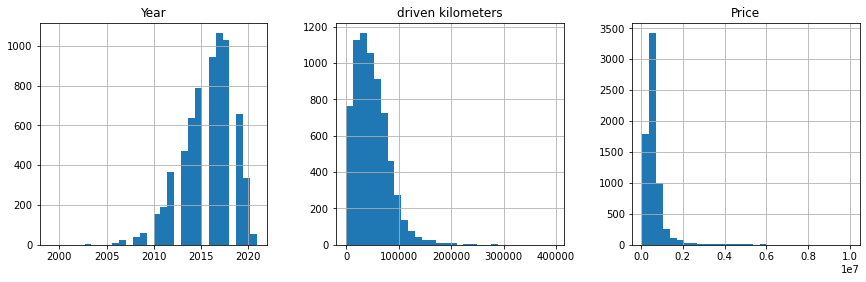

In [19]:
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [20]:
#in this visual we can understand that motsly cars belong to the period of 2017-2018.
#Most data of asvailability of cars belongs to the the data concertaion of 50000-70000 Kms. 

Text(0.5, 1.0, 'Brand available in Market')

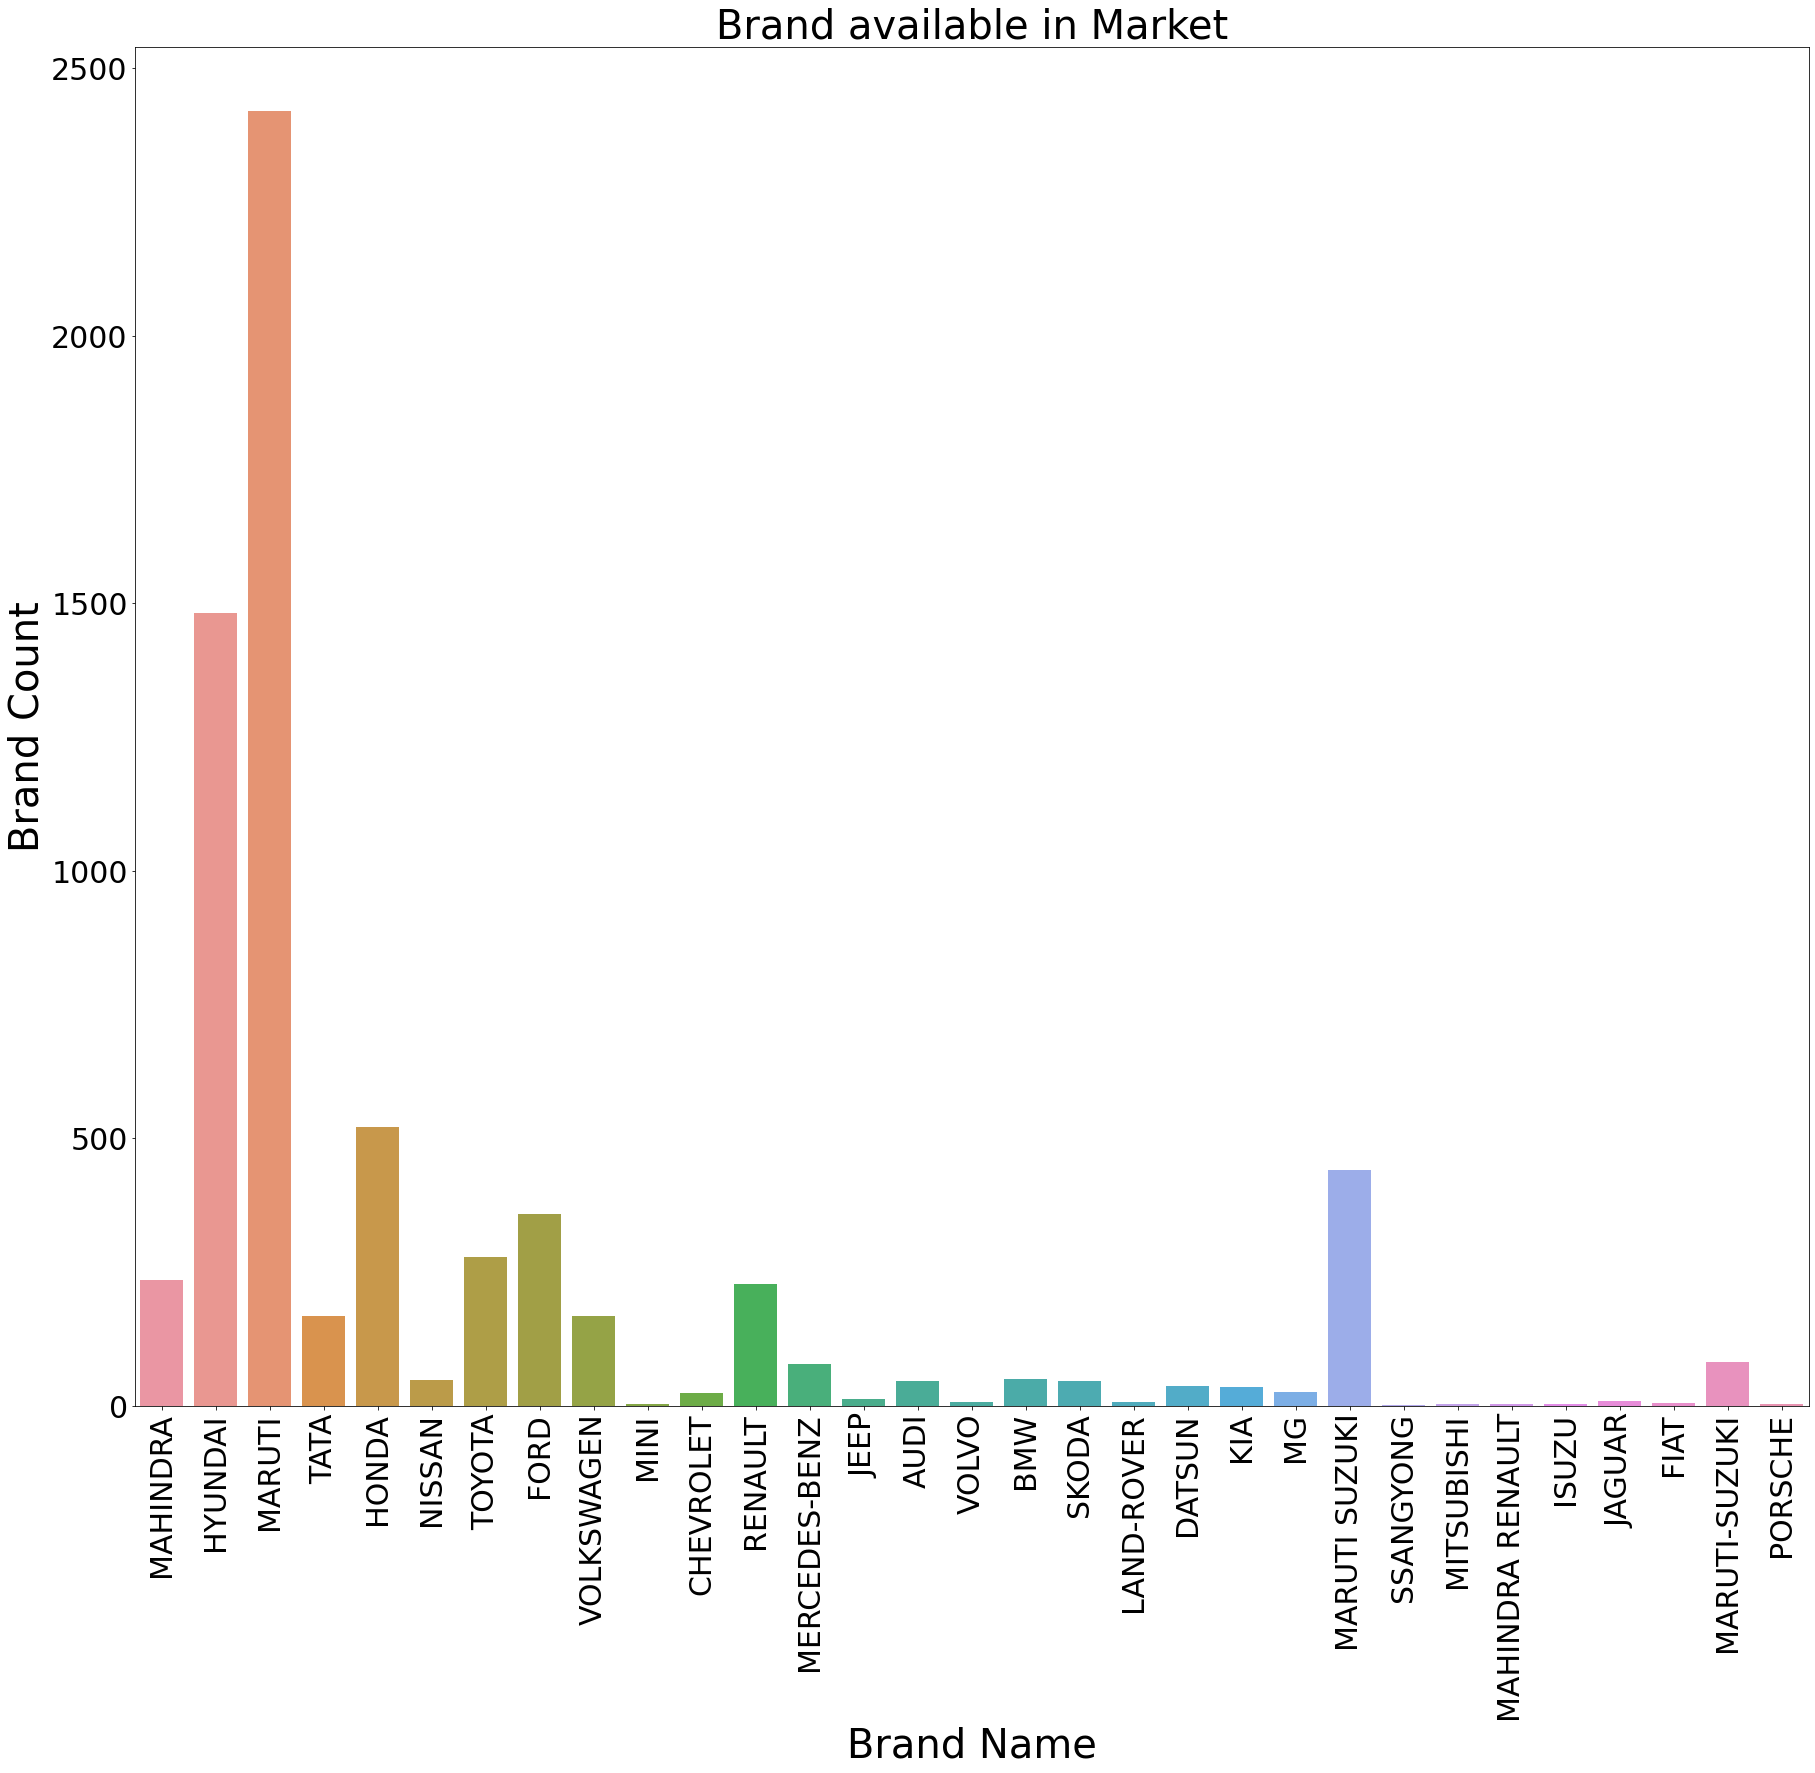

In [21]:
plt.figure(figsize=(30,25))
sns.countplot(x="Brand",data=df)
plt.xticks(rotation = 90,fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Brand Name",fontsize=40)
plt.ylabel("Brand Count", fontsize=40)
plt.title('Brand available in Market', fontsize=40)

In [22]:
#in this we can see that the MARUTI and the HYUNDAI are the best second hand market. Most of the poople prefer to buy MARUTI & HYUNDAUI. 

Text(0.5, 1.0, 'Cars Availability in Market-Manufacturing Year Wise')

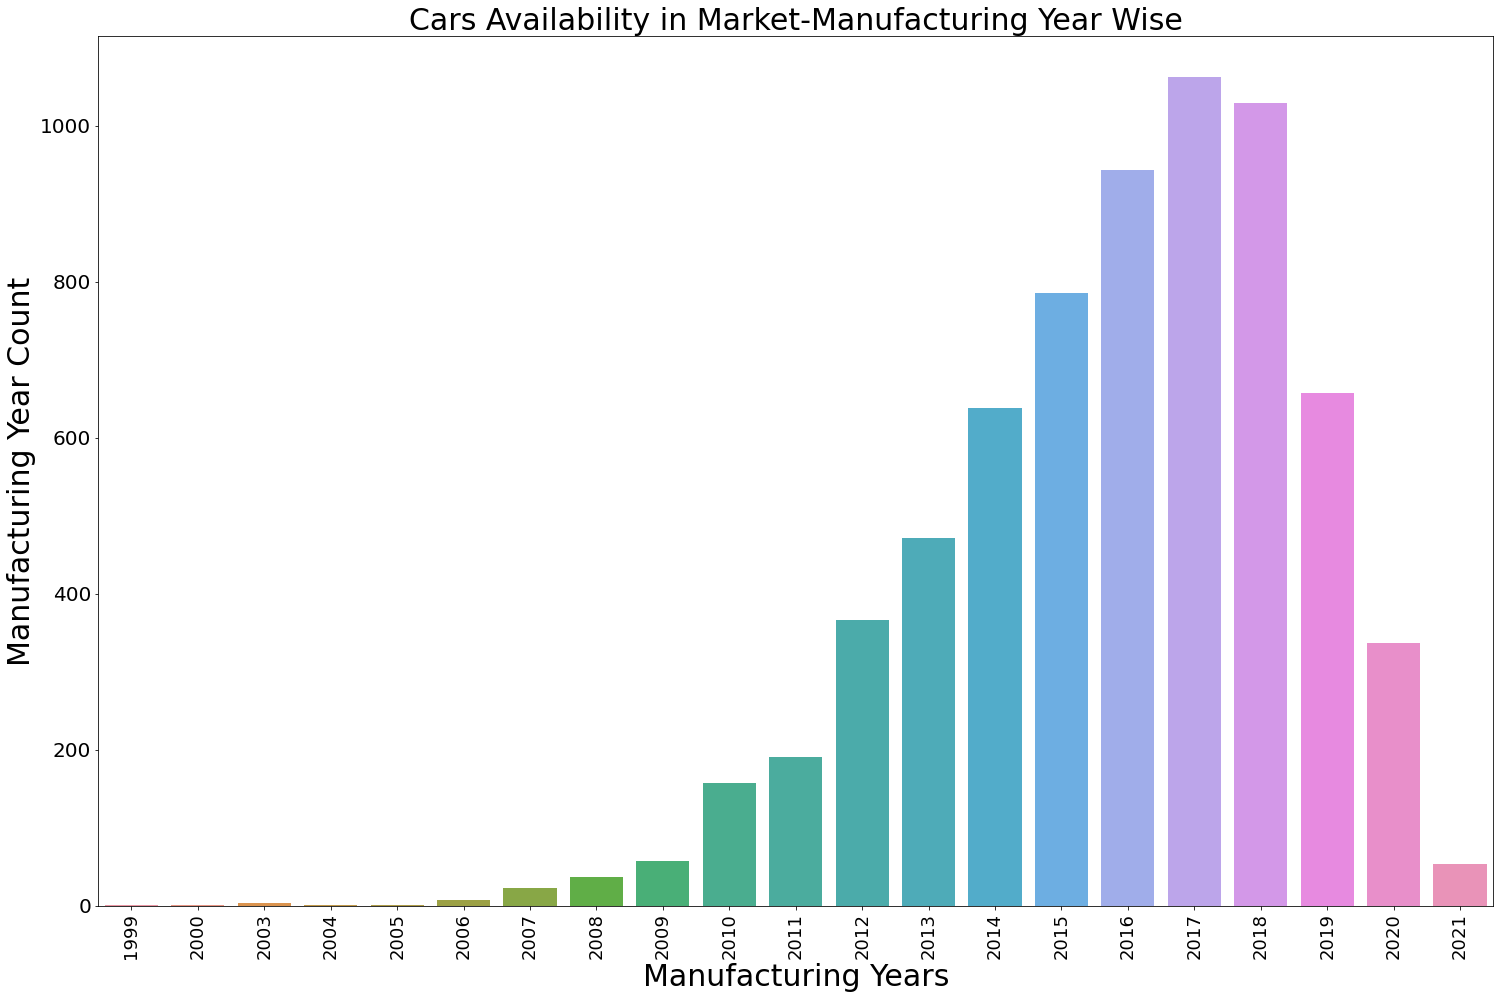

In [23]:
plt.figure(figsize=(25,16))
sns.countplot(x="Year",data=df)
plt.xticks(rotation = 90,fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Manufacturing Years",fontsize = 30)
plt.ylabel("Manufacturing Year Count",fontsize = 30)
plt.title('Cars Availability in Market-Manufacturing Year Wise',fontsize = 30)

In [24]:
#In this visual we can see that mnost of cars belongs to the manufactuing year of 2017 & 2018 

In [25]:
#Checking FUEL types 
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'Electric', 'CNG\n+ CNG Kit',
       'CNG +\nCNG Kit', 'CNG', 'Petrol +\nCNG Kit', 'Petrol + CNG Kit',
       'Petrol + Cng', 'CNG + Cng', 'Petrol + CNG', 'Petrol + LPG'],
      dtype=object)

In [26]:
def replace_name(a,b):
    df.fuel.replace(a,b,inplace=True)

replace_name('CNG\n+ CNG Kit','CNG +\nCNG Kit')
replace_name('CNG + Cng','CNG +\nCNG Kit')
replace_name('Petrol + Cng','Petrol + CNG')

df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'Electric', 'CNG +\nCNG Kit', 'CNG',
       'Petrol +\nCNG Kit', 'Petrol + CNG Kit', 'Petrol + CNG',
       'Petrol + LPG'], dtype=object)

Text(0.5, 1.0, 'Fuel Type was car availability in market')

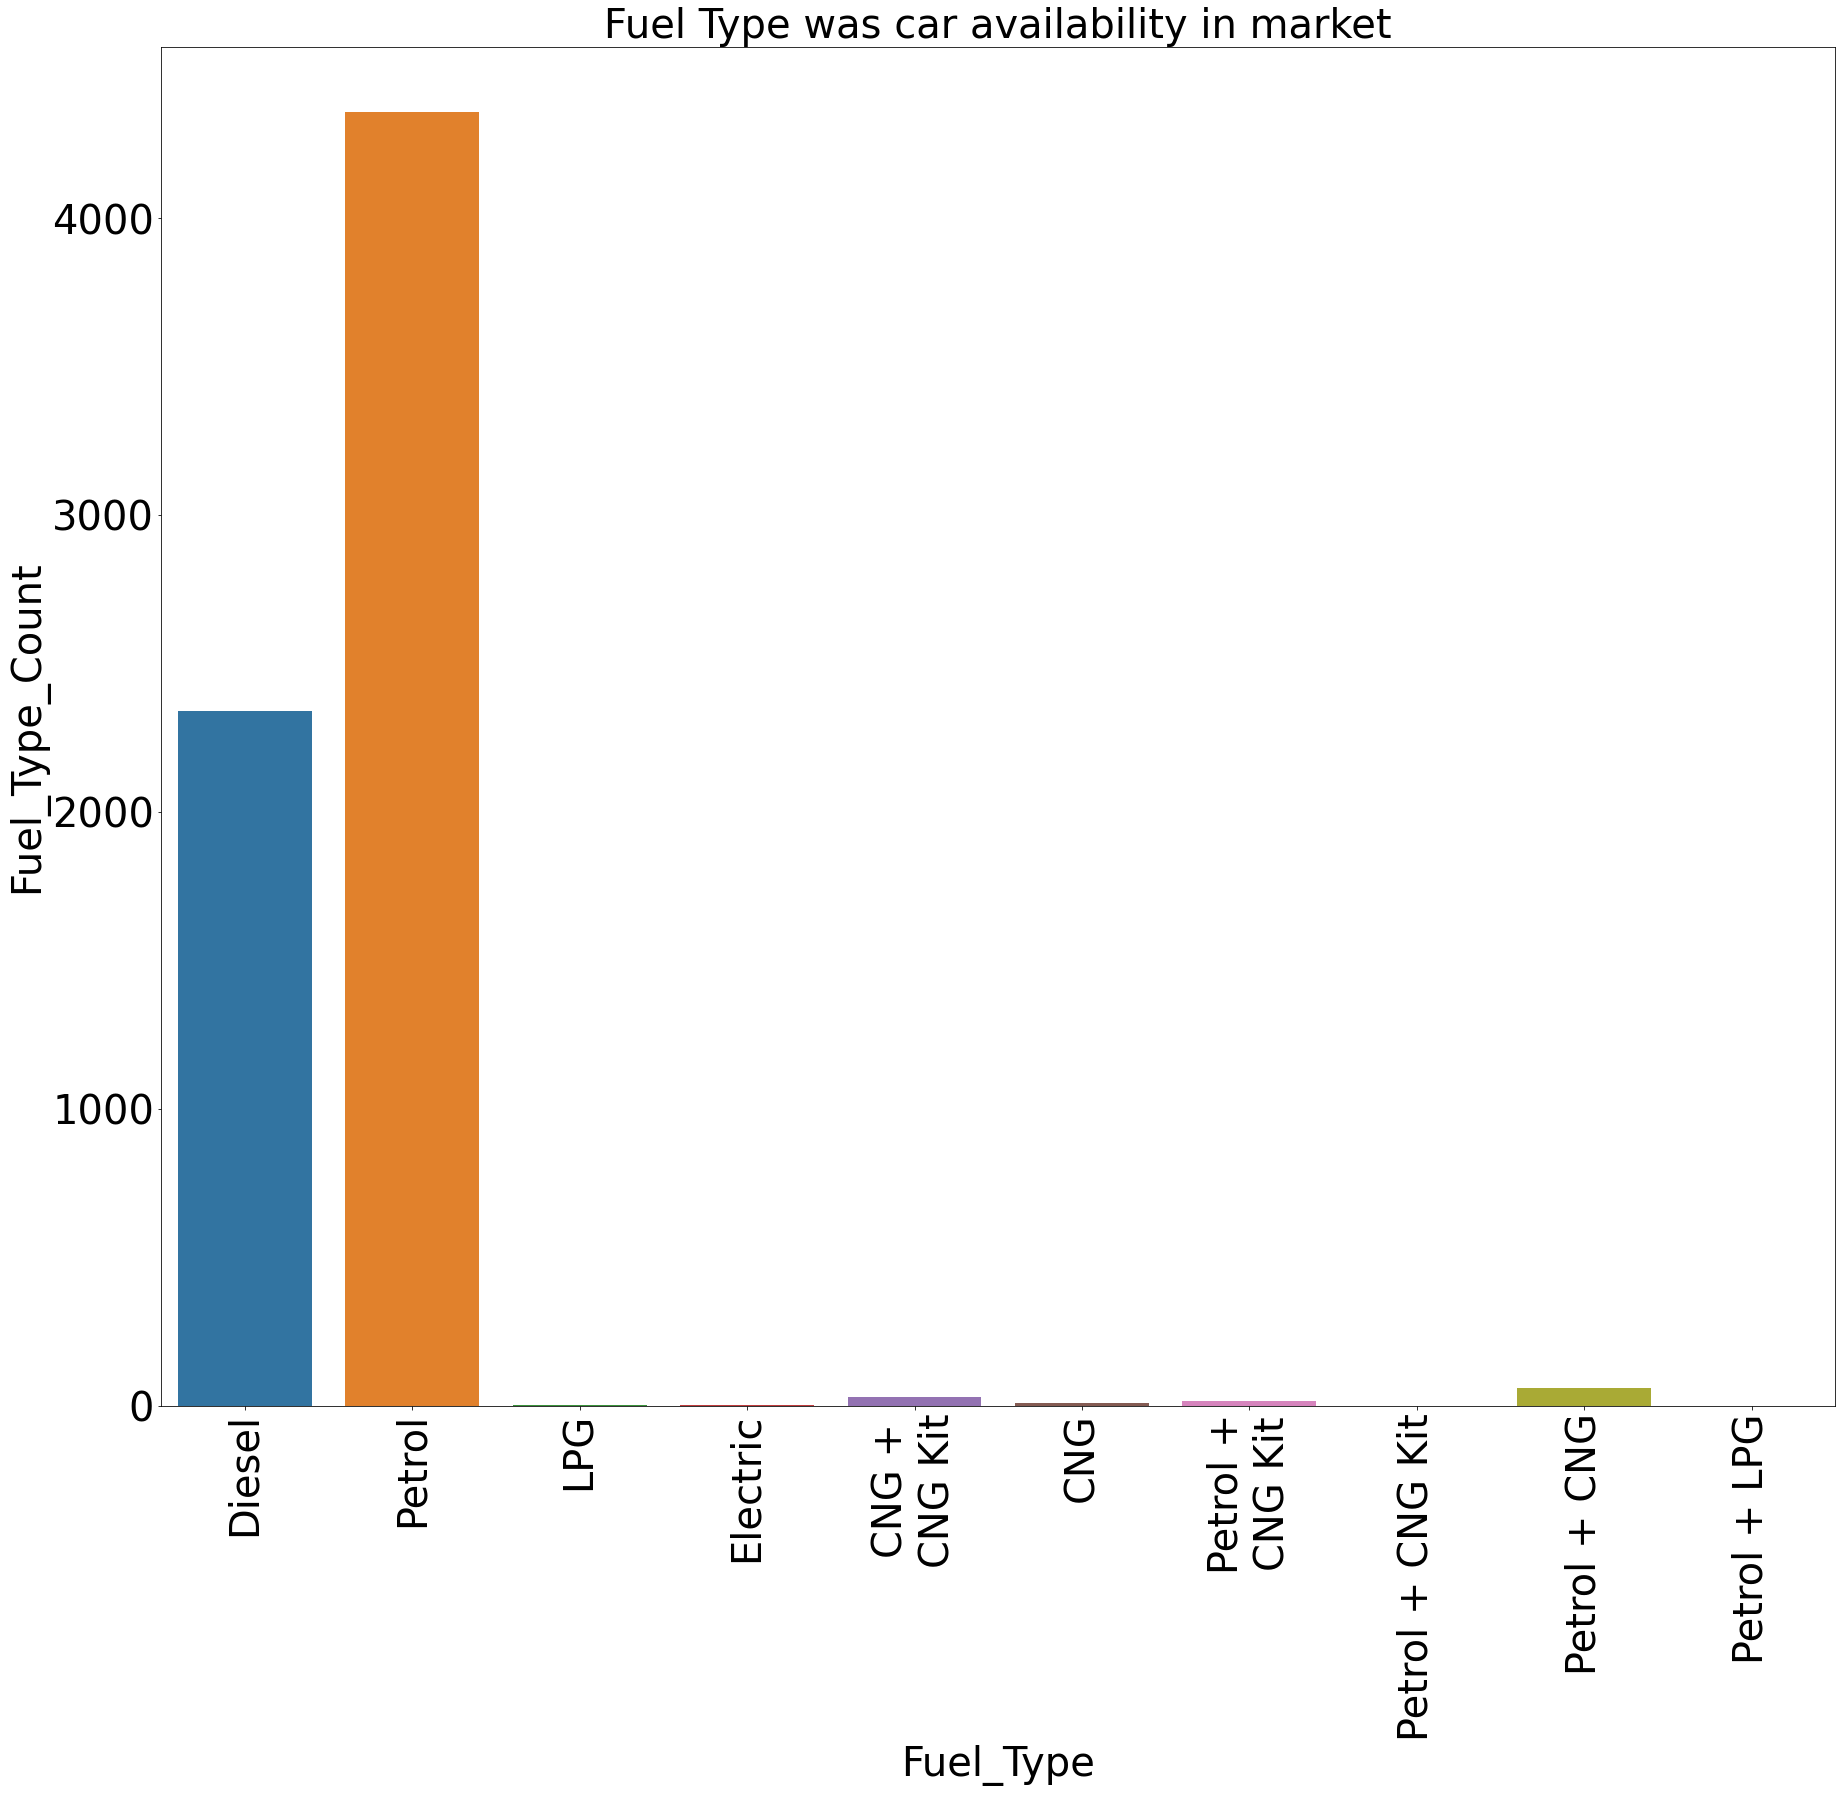

In [27]:
plt.figure(figsize=(30,25))
sns.countplot(x="fuel",data=df)
plt.xticks(rotation = 90,fontsize = 40)
plt.yticks(fontsize = 40)
plt.xlabel("Fuel_Type",fontsize = 40)
plt.ylabel("Fuel_Type_Count",fontsize = 40)
plt.title('Fuel Type was car availability in market',fontsize = 40)

In [28]:
#In this visual we can see that the mostly availability of the vehicle type is Diesel and the Petrol in the market.  

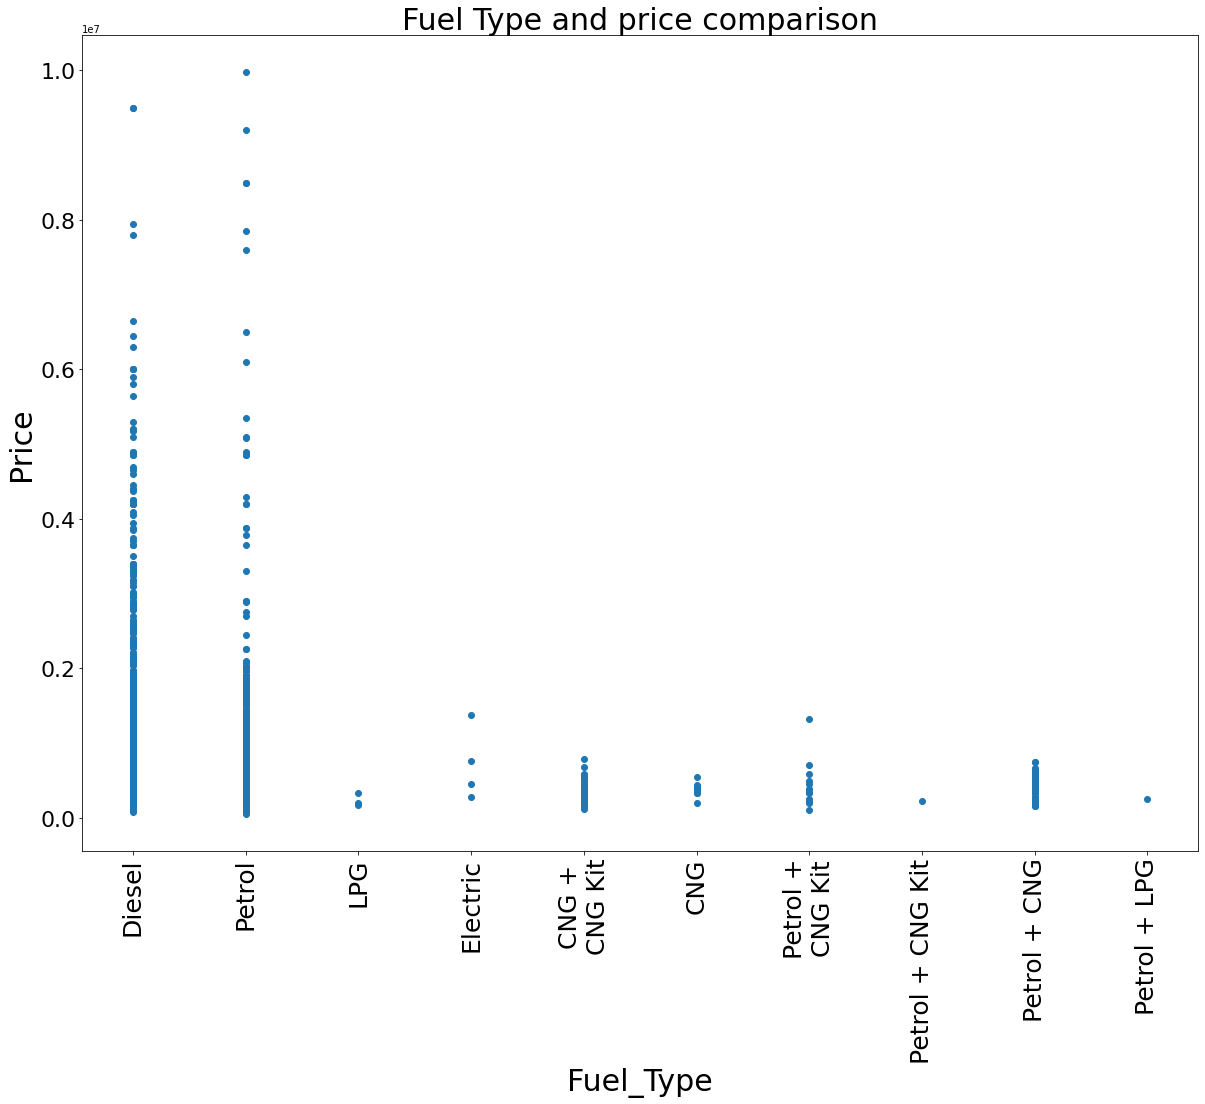

In [29]:
plt.figure(figsize=(20,15))
plt.xticks(rotation = 90,fontsize = 25)
plt.yticks(fontsize = 22)
plt.xlabel("Fuel_Type",fontsize = 30)
plt.ylabel("Price",fontsize = 30)
plt.title('Fuel Type and price comparison',fontsize = 30)
plt.scatter(df["fuel"],df["Price"])
plt.show()

in this we can see that the prices of Diesel and the Petrol vehicles are high in comparison to other vehicle tyoes

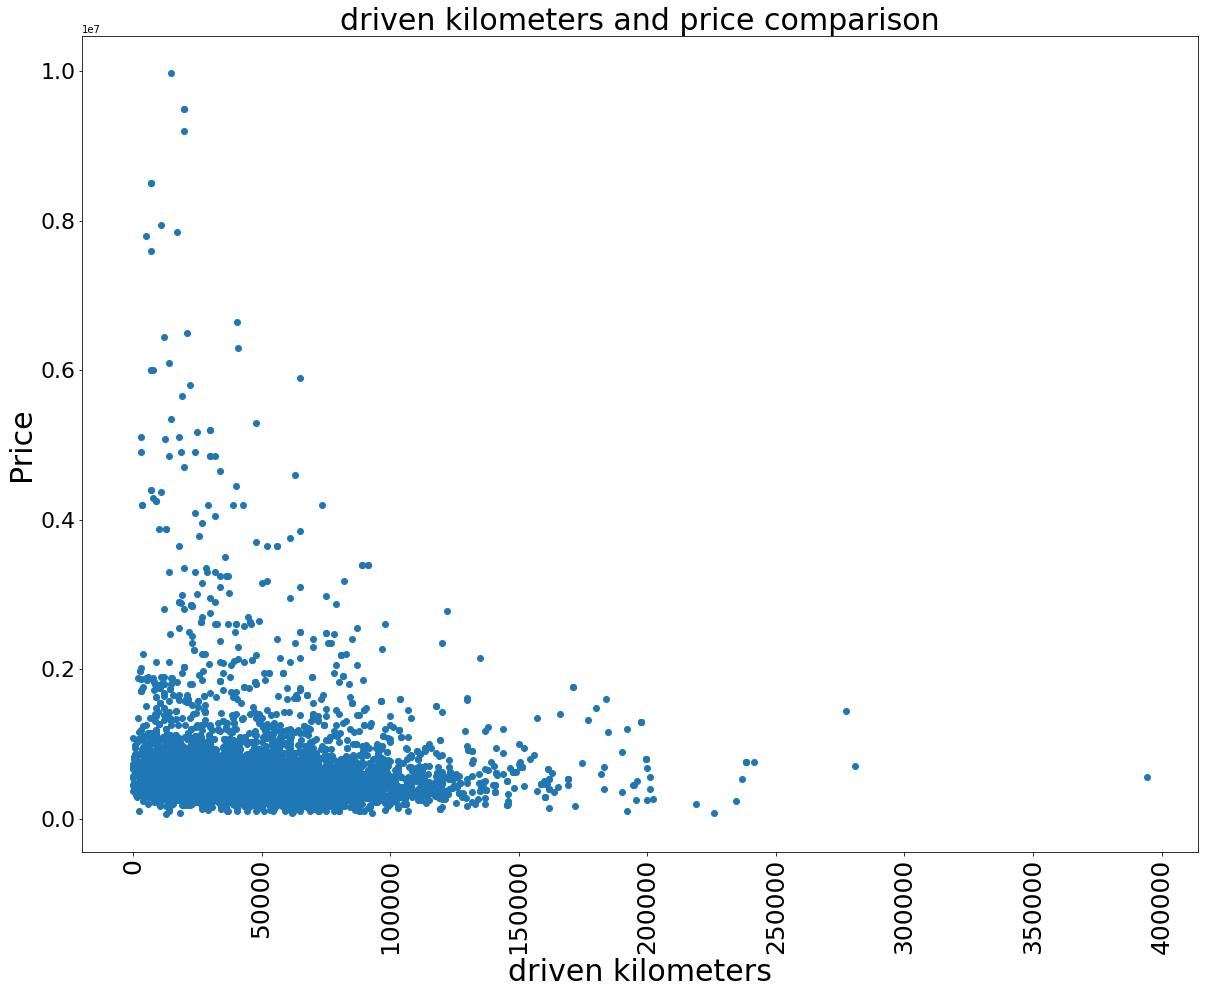

In [30]:
plt.figure(figsize=(20,15))
plt.xticks(rotation = 90,fontsize = 25)
plt.yticks(fontsize = 22)
plt.xlabel("driven kilometers",fontsize = 30)
plt.ylabel("Price",fontsize = 30)
plt.title('driven kilometers and price comparison',fontsize = 30)
plt.scatter(df["driven kilometers"],df["Price"])
plt.show()

In [31]:
#In this Visual we can see that the Price and the Driven Kilometer has negative correleation. the more the kilometers increases the prices get decrease. 

In [32]:
df2=df["Brand"].copy()
df2

0       MAHINDRA
1        HYUNDAI
2         MARUTI
3        HYUNDAI
4           TATA
          ...   
6819     HYUNDAI
6820      MARUTI
6821     HYUNDAI
6822       HONDA
6823      MARUTI
Name: Brand, Length: 6824, dtype: object

In [33]:
df2.value_counts()

MARUTI              2419
HYUNDAI             1482
HONDA                520
MARUTI SUZUKI        441
FORD                 359
TOYOTA               277
MAHINDRA             235
RENAULT              228
TATA                 168
VOLKSWAGEN           167
MARUTI-SUZUKI         81
MERCEDES-BENZ         77
BMW                   50
NISSAN                48
SKODA                 47
AUDI                  46
DATSUN                36
KIA                   34
MG                    25
CHEVROLET             24
JEEP                  13
JAGUAR                 9
LAND-ROVER             7
VOLVO                  7
FIAT                   5
MAHINDRA RENAULT       4
MITSUBISHI             4
PORSCHE                3
ISUZU                  3
MINI                   3
SSANGYONG              2
Name: Brand, dtype: int64

In [34]:
def replace_name(a,b):
    df2.replace(a,b,inplace=True)

replace_name("CHEVROLET","OTHERS")
replace_name("JEEP","OTHERS")
replace_name("JAGUAR","OTHERS")
replace_name("VOLVO","OTHERS")
replace_name("LAND-ROVER","OTHERS")
replace_name("FIAT","OTHERS")
replace_name("MAHINDRA RENAULT","OTHERS")
replace_name("MITSUBISHI","OTHERS")
replace_name("ISUZU","OTHERS")
replace_name("PORSCHE","OTHERS")
replace_name("MINI","OTHERS")
replace_name("BMW","OTHERS")
replace_name("NISSAN","OTHERS")
replace_name("SKODA","OTHERS")
replace_name("AUDI","OTHERS")
replace_name("KIA","OTHERS")
replace_name("MG","OTHERS")
replace_name("SSANGYONG","OTHERS")

In [35]:
df["Brand"].value_counts()

MARUTI              2419
HYUNDAI             1482
HONDA                520
MARUTI SUZUKI        441
FORD                 359
TOYOTA               277
MAHINDRA             235
RENAULT              228
TATA                 168
VOLKSWAGEN           167
MARUTI-SUZUKI         81
MERCEDES-BENZ         77
BMW                   50
NISSAN                48
SKODA                 47
AUDI                  46
DATSUN                36
KIA                   34
MG                    25
CHEVROLET             24
JEEP                  13
JAGUAR                 9
LAND-ROVER             7
VOLVO                  7
FIAT                   5
MAHINDRA RENAULT       4
MITSUBISHI             4
PORSCHE                3
ISUZU                  3
MINI                   3
SSANGYONG              2
Name: Brand, dtype: int64

In [36]:
df2=pd.DataFrame(data=df2)
df2.value_counts()

Brand        
MARUTI           2419
HYUNDAI          1482
HONDA             520
MARUTI SUZUKI     441
FORD              359
OTHERS            334
TOYOTA            277
MAHINDRA          235
RENAULT           228
TATA              168
VOLKSWAGEN        167
MARUTI-SUZUKI      81
MERCEDES-BENZ      77
DATSUN             36
dtype: int64

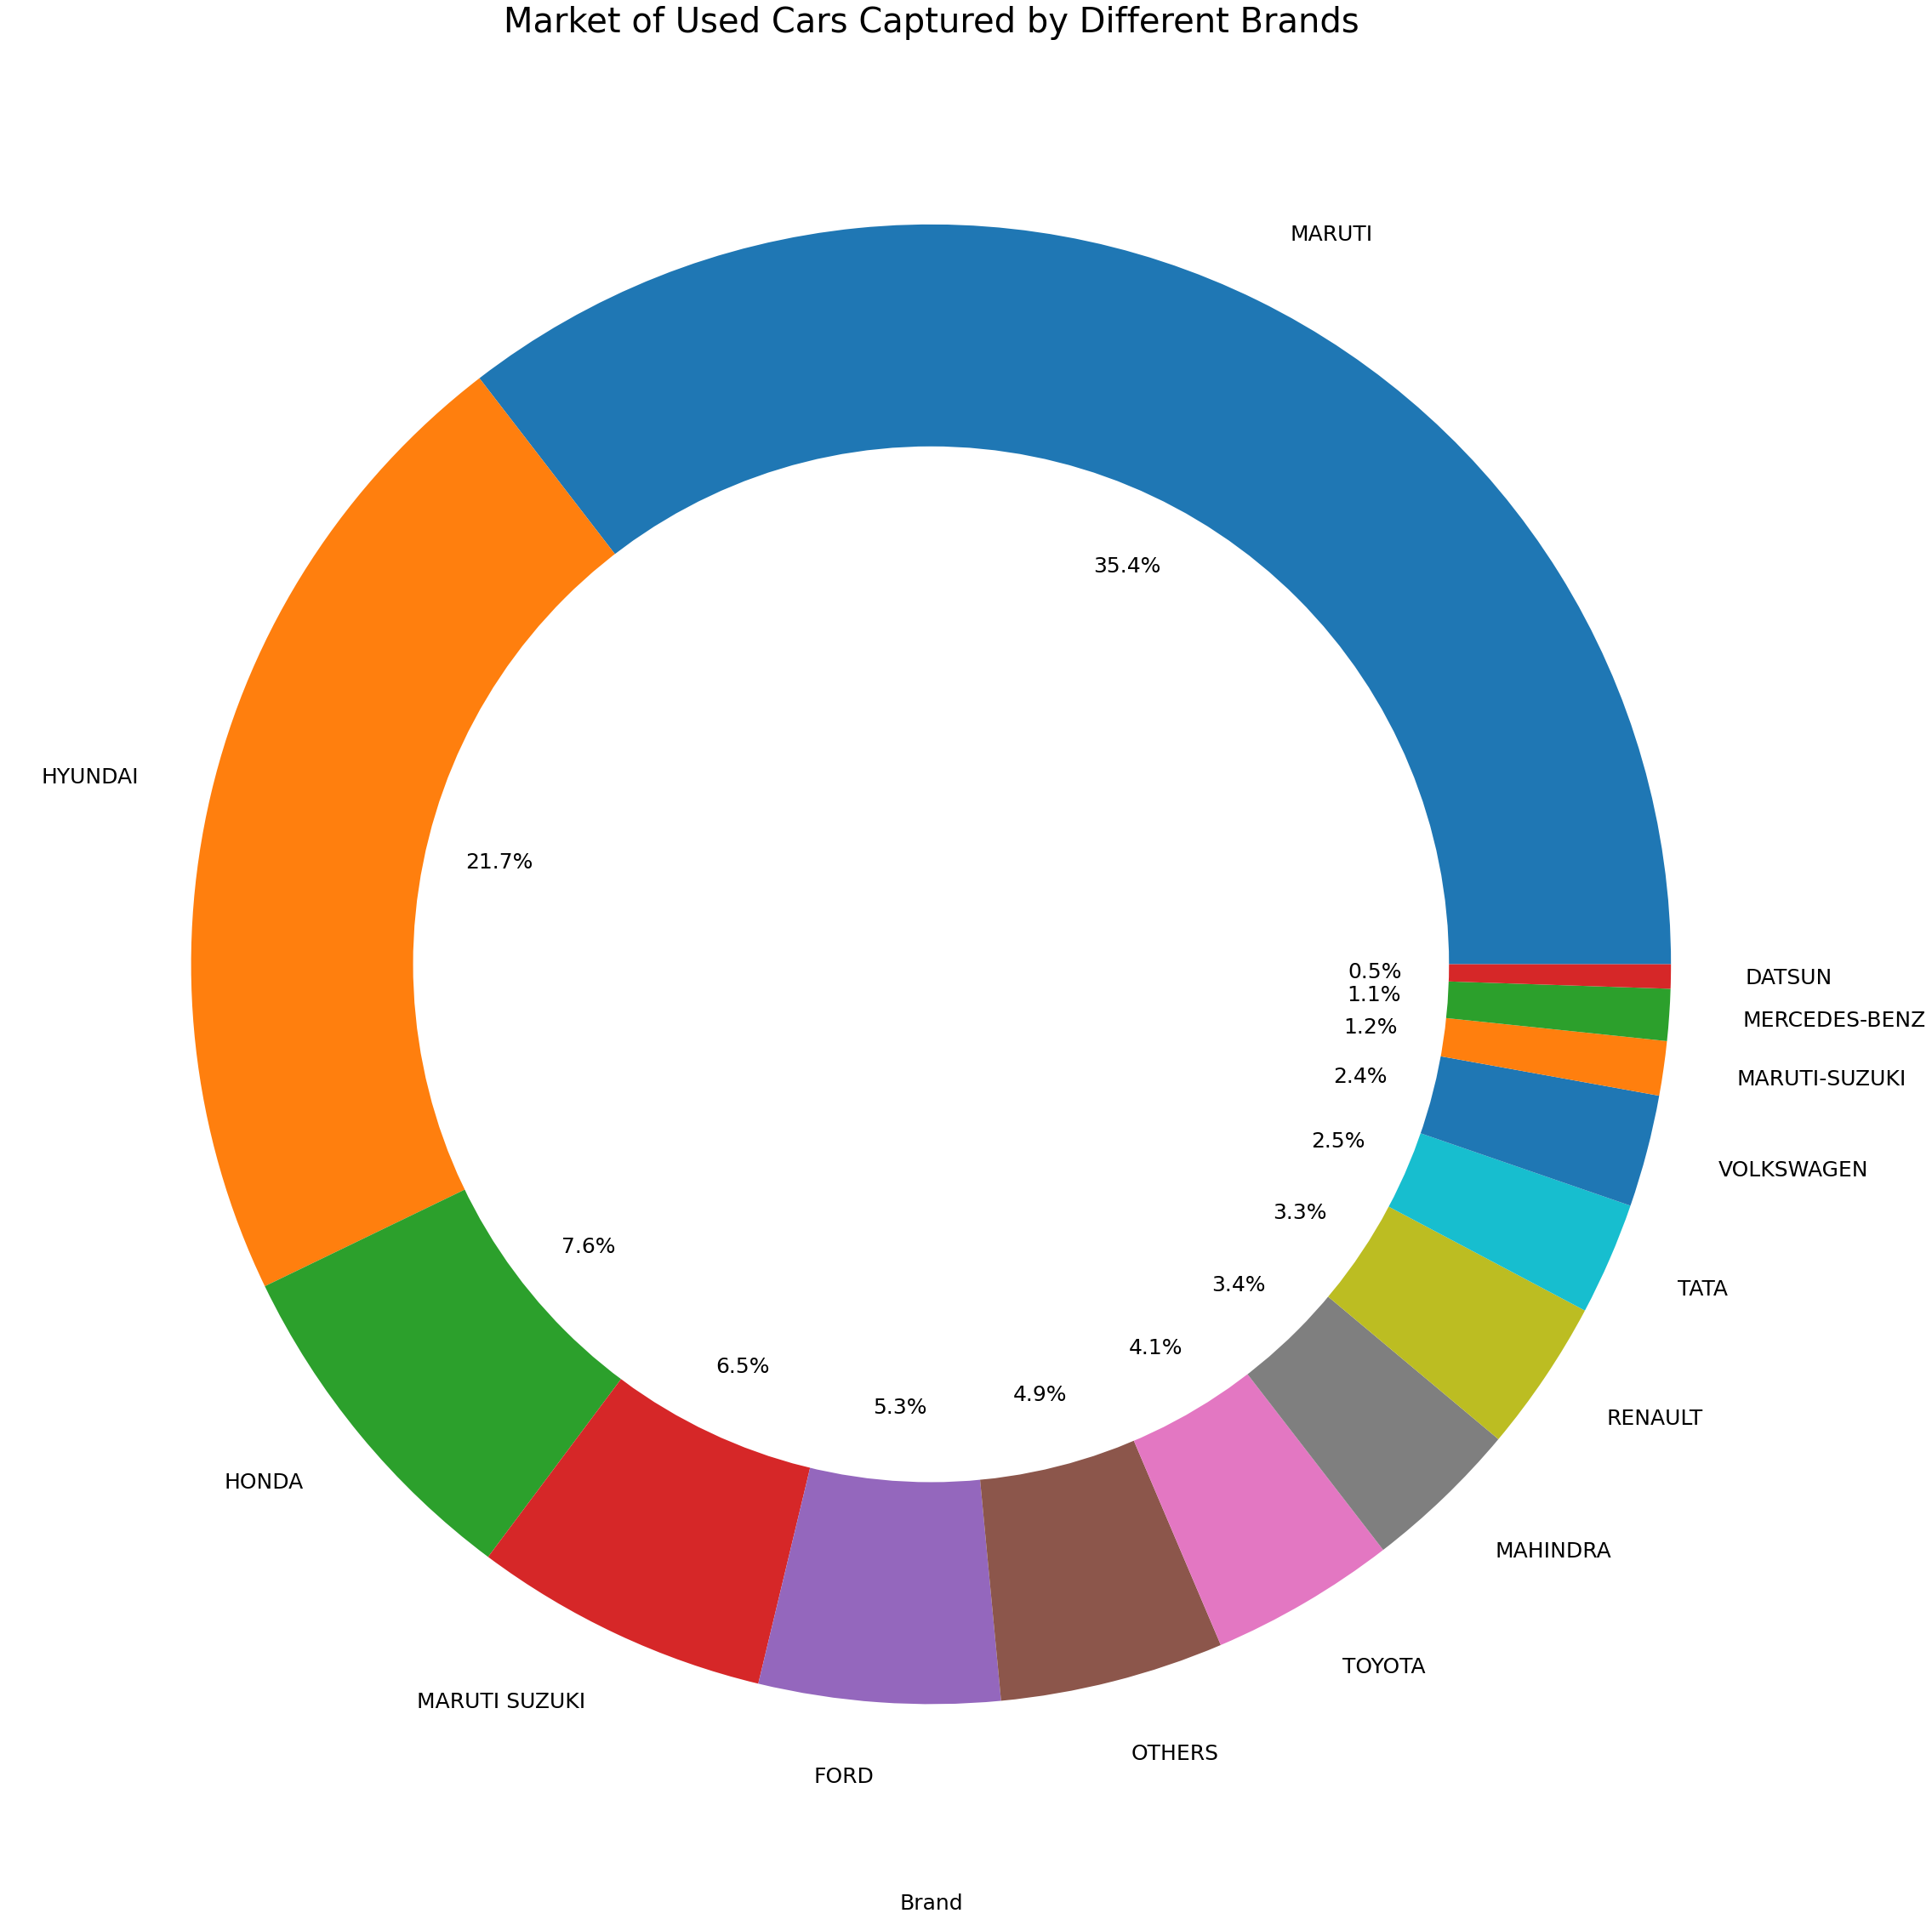

<Figure size 432x288 with 0 Axes>

In [37]:
for i in df2:
    plt.figure(figsize=(45,40))
    plt.rc('font', size=25)
    df2[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.title('Market of Used Cars Captured by Different Brands',fontsize = 40)
    plt.figure()

In [38]:
#In this Pie chart we can see that most of the market share has been taken over by Hyundai and Maruti

In [39]:
df["fuel"].value_counts()

Petrol               4359
Diesel               2341
Petrol + CNG           60
CNG +\nCNG Kit         30
Petrol +\nCNG Kit      16
CNG                     9
Electric                4
LPG                     3
Petrol + LPG            1
Petrol + CNG Kit        1
Name: fuel, dtype: int64

In [40]:
df1=df["fuel"].copy()

In [41]:
def replace_name(a,b):
    df1.replace(a,b,inplace=True)
    
replace_name('CNG +\nCNG Kit','Others')
replace_name('Electric','Others')
replace_name('LPG','Others')
replace_name('Petrol +\nCNG Kit','Others')
replace_name('Petrol + CNG','Others')
replace_name('Petrol + LPG','Others')
replace_name('CNG','Others')
replace_name('Petrol + CNG Kit','Others')
df1=pd.DataFrame(data=df1)
df1.value_counts()

fuel  
Petrol    4359
Diesel    2341
Others     124
dtype: int64

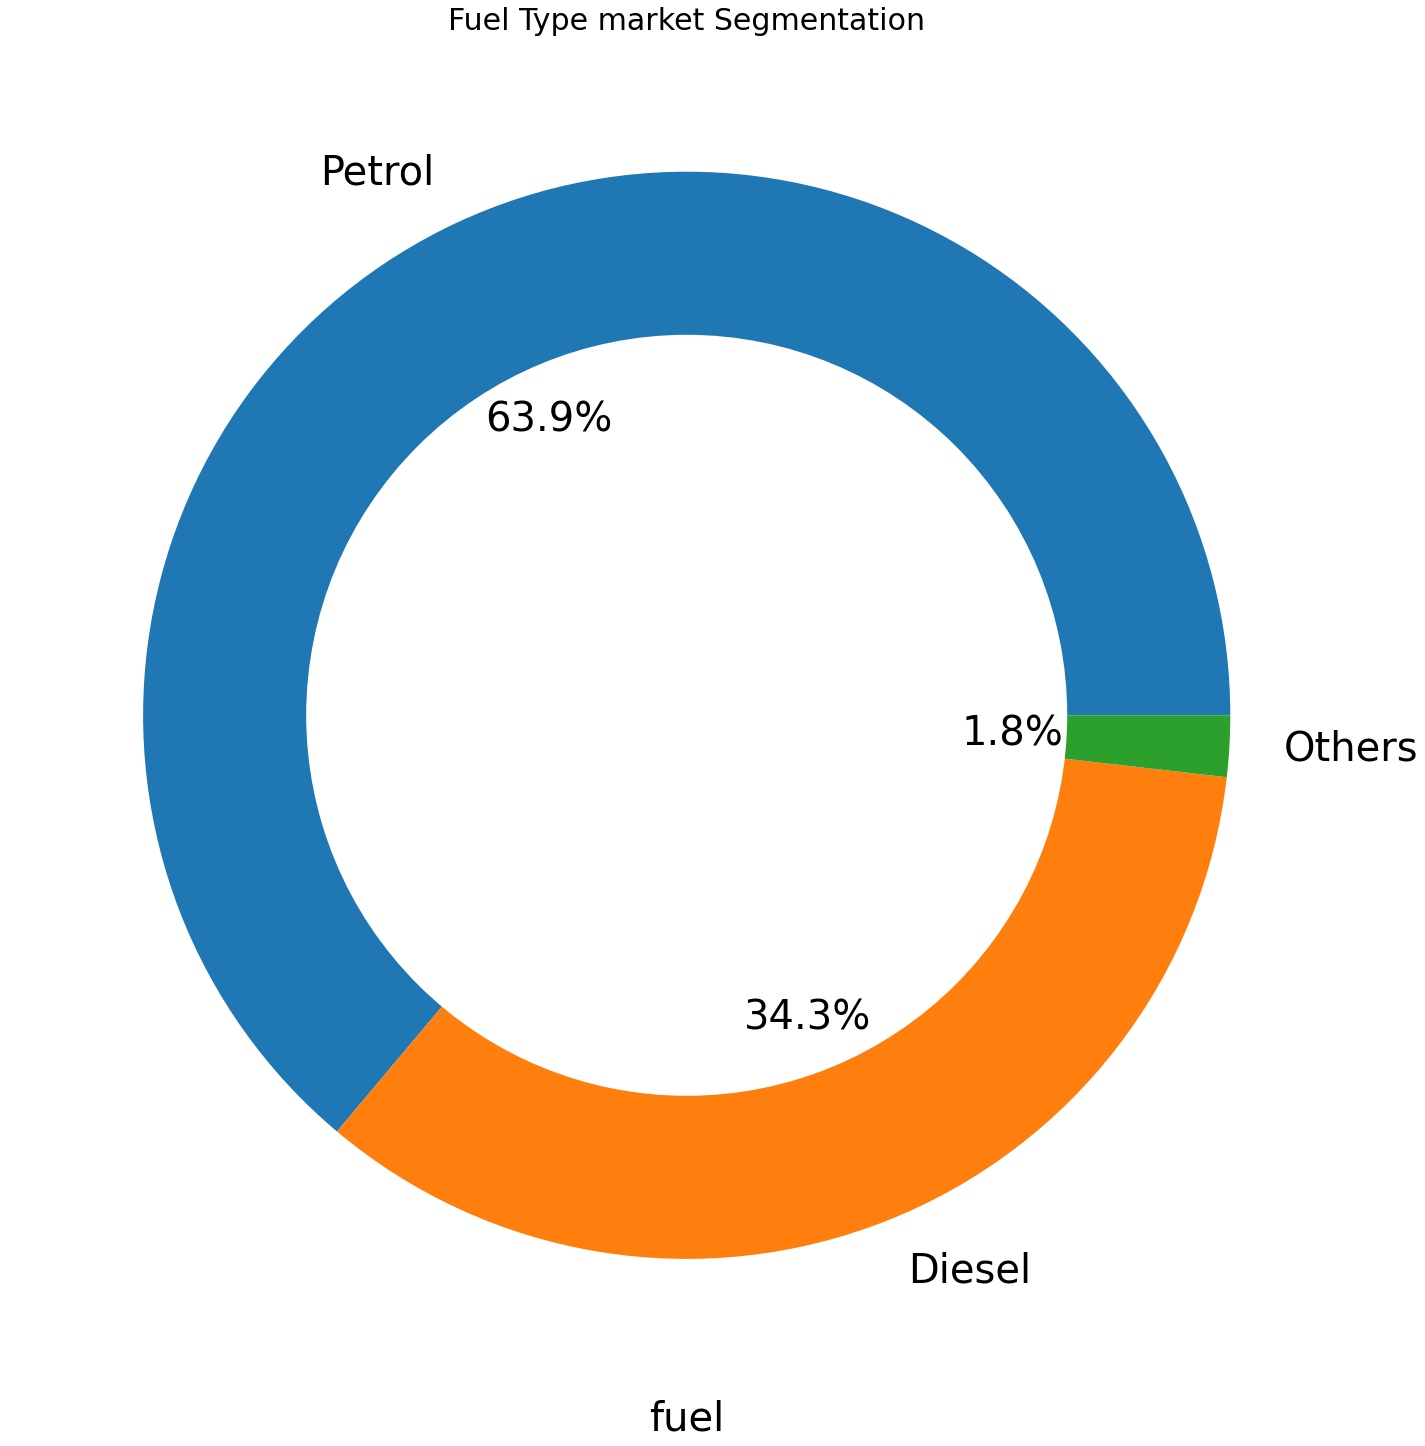

<Figure size 432x288 with 0 Axes>

In [42]:
for i in df1:
    plt.figure(figsize=(30,25))
    plt.rc('font', size=40)
    df1[i].value_counts().plot.pie(autopct='%1.1f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.title("Fuel Type market Segmentation", Fontsize=30)
    plt.figure()
       

In [43]:
#The Mainly mraket of used cars are captured by Patrol Car  which is 69%, followed by Dielsel Car which is 34%

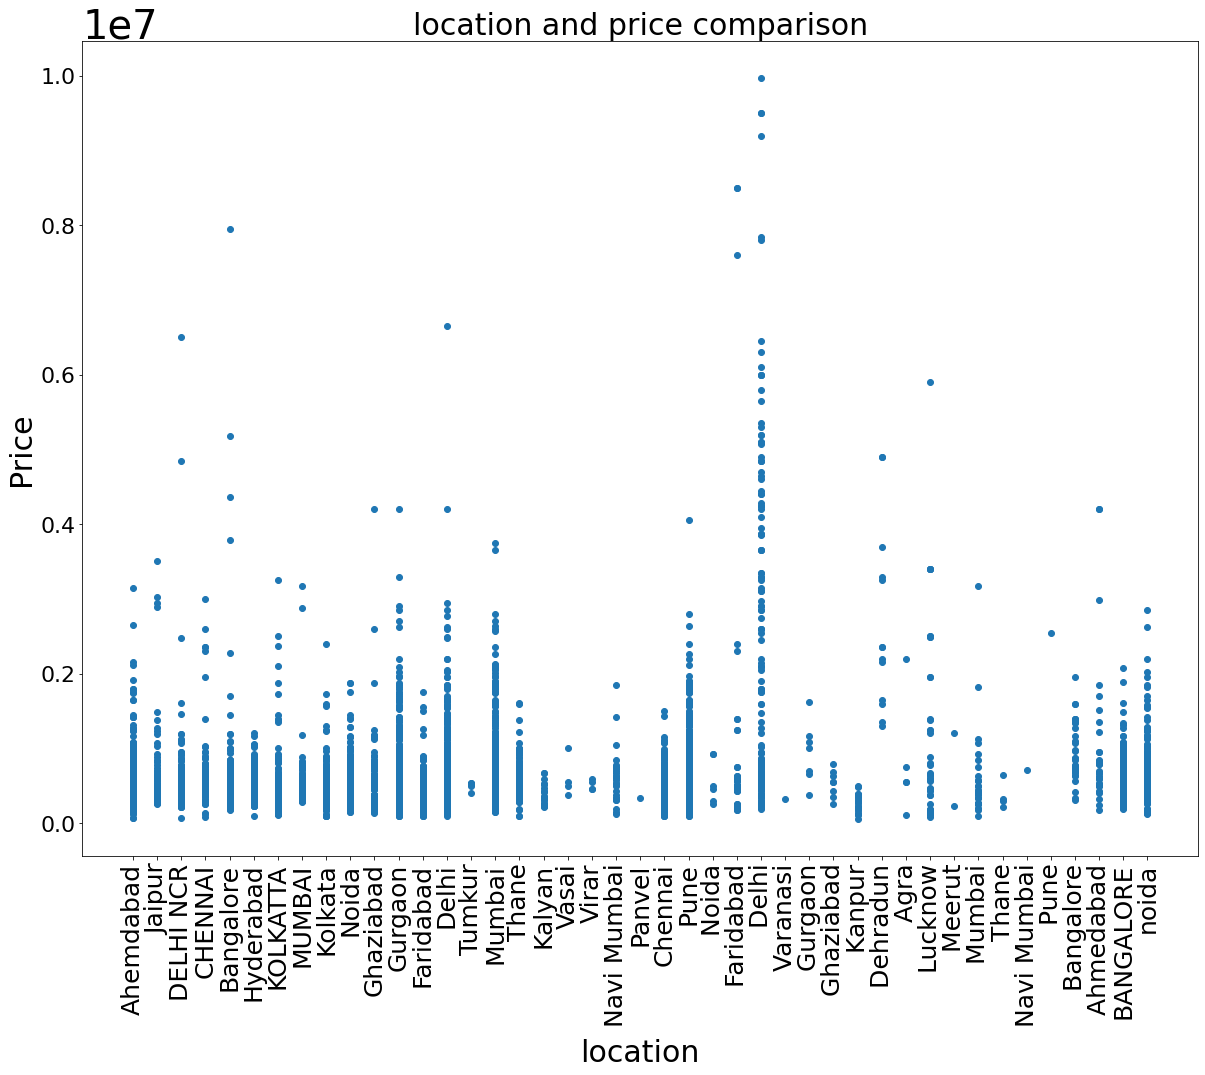

In [44]:
plt.figure(figsize=(20,15))
plt.scatter(df["location"],df["Price"])
plt.xticks(rotation = 90,fontsize = 25)
plt.yticks(fontsize = 22)
plt.xlabel("location",fontsize = 30)
plt.ylabel("Price",fontsize = 30)
plt.title('location and price comparison',fontsize = 30)
plt.show()

In [45]:
#The prices and availability of the used cars are  high in Delhi NCR.

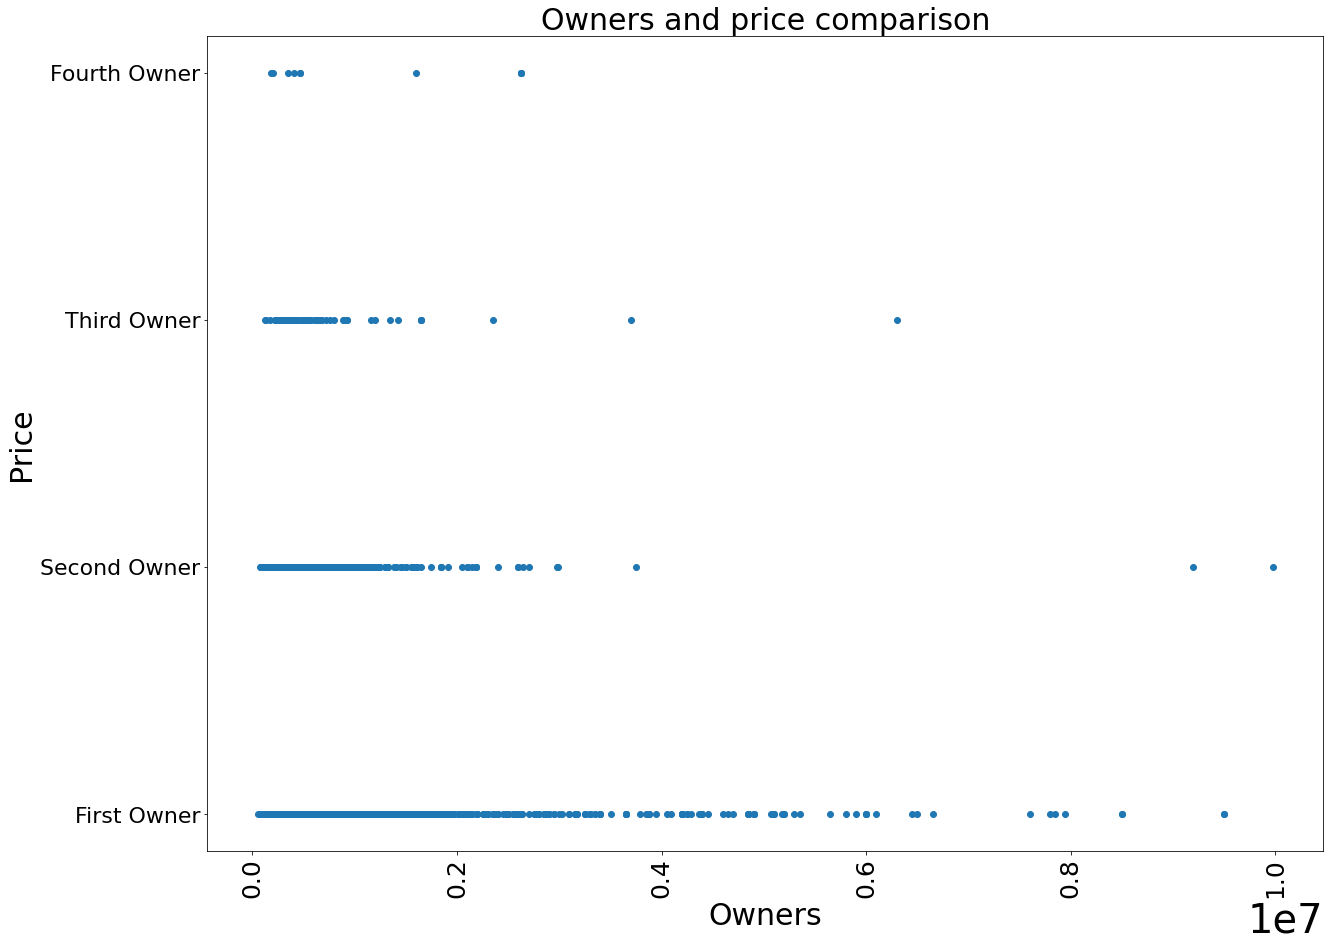

In [46]:
plt.figure(figsize=(20,15))
plt.scatter(df["Price"],df["number of owners"])
plt.xticks(rotation = 90,fontsize = 25)
plt.yticks(fontsize = 22)
plt.xlabel("Owners",fontsize = 30)
plt.ylabel("Price",fontsize = 30)
plt.title('Owners and price comparison',fontsize = 30)
plt.show()

In [47]:
#The No of Owners are the Price have the negative correlation. As the no of the owners increases the price of the cars decreases. 

In [48]:
df.corr()

,Year,driven kilometers,Price
Year,1.000000,-0.477576,0.282618
driven kilometers,-0.477576,1.000000,-0.096016
Price,0.282618,-0.096016,1.000000


<AxesSubplot:>

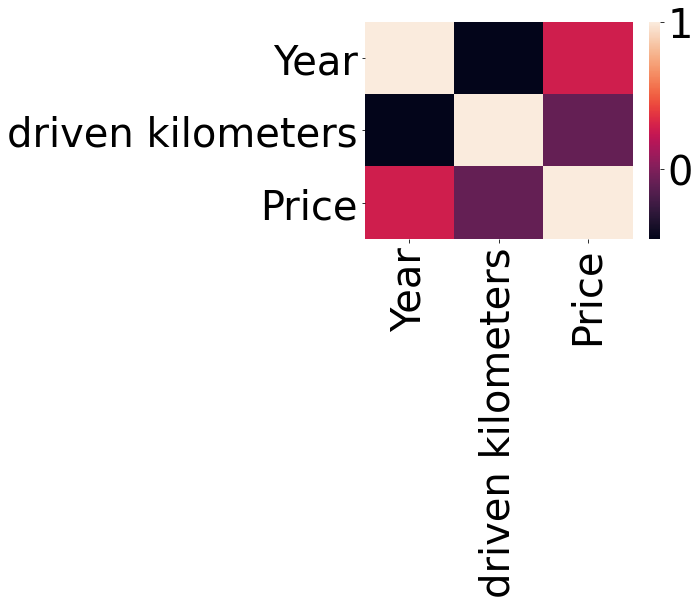

In [49]:
sns.heatmap(df.corr())

In [50]:
#In this we can clearly see that the driven kilometers and the manufacturing year both has negative correlation WIth Price. 

In [51]:
df["Model"].unique()

array(['Xylo', 'i20', 'Swift', 'Vista', 'City', 'Wagon', 'Terrano',
       'Baleno', 'Innova', 'Verna', 'Brio', 'EcoSport', 'Vento', 'Indica',
       'Micra', 'XUV500', 'Scorpio', 'Creta', 'Fortuner', 'Santro',
       'Tucson', 'Grand', 'Vitara', 'Harrier', 'Nano', 'Cooper', 'Ciaz',
       'Alto', 'SX4', 'Amaze', 'Enjoy', 'Ertiga', 'Elantra', 'KWID',
       'Endeavour', 'i10', 'E-Class', 'Nexon', 'Tiago', 'Ritz', 'Bolero',
       'EON', 'WR-V', 'Cruze', 'Etios', 'Compass', 'Polo', 'Sunny', 'New',
       'Xcent', 'WagonR', 'Swift Dzire', 'Eeco', 'S-Presso', 'Jazz',
       'Grand i10', 'A4', 'Ignis', 'EtiosLiva', 'Ameo', 'A6', 'Q5',
       'Alto 800', 'S60CrossCountry', 'AltoK10', 'Q2', 'Glanza',
       'MicraActive', '3Series', 'Ecosport', 'Venue', 'Figo', 'Rapid',
       'KUV100', 'ZenEstilo', 'VitaraBrezza', 'Thar', 'CorollaAltis',
       'FigoAspire', 'SX4SCross', 'Mobilio', 'EtiosCross', 'Celerio',
       'Duster', 'XUV300', 'GL-Class', 'X4', 'Qualis', 'S-Cross',
       'CrossPolo',

Text(0.5, 1.0, 'Model Name counting details')

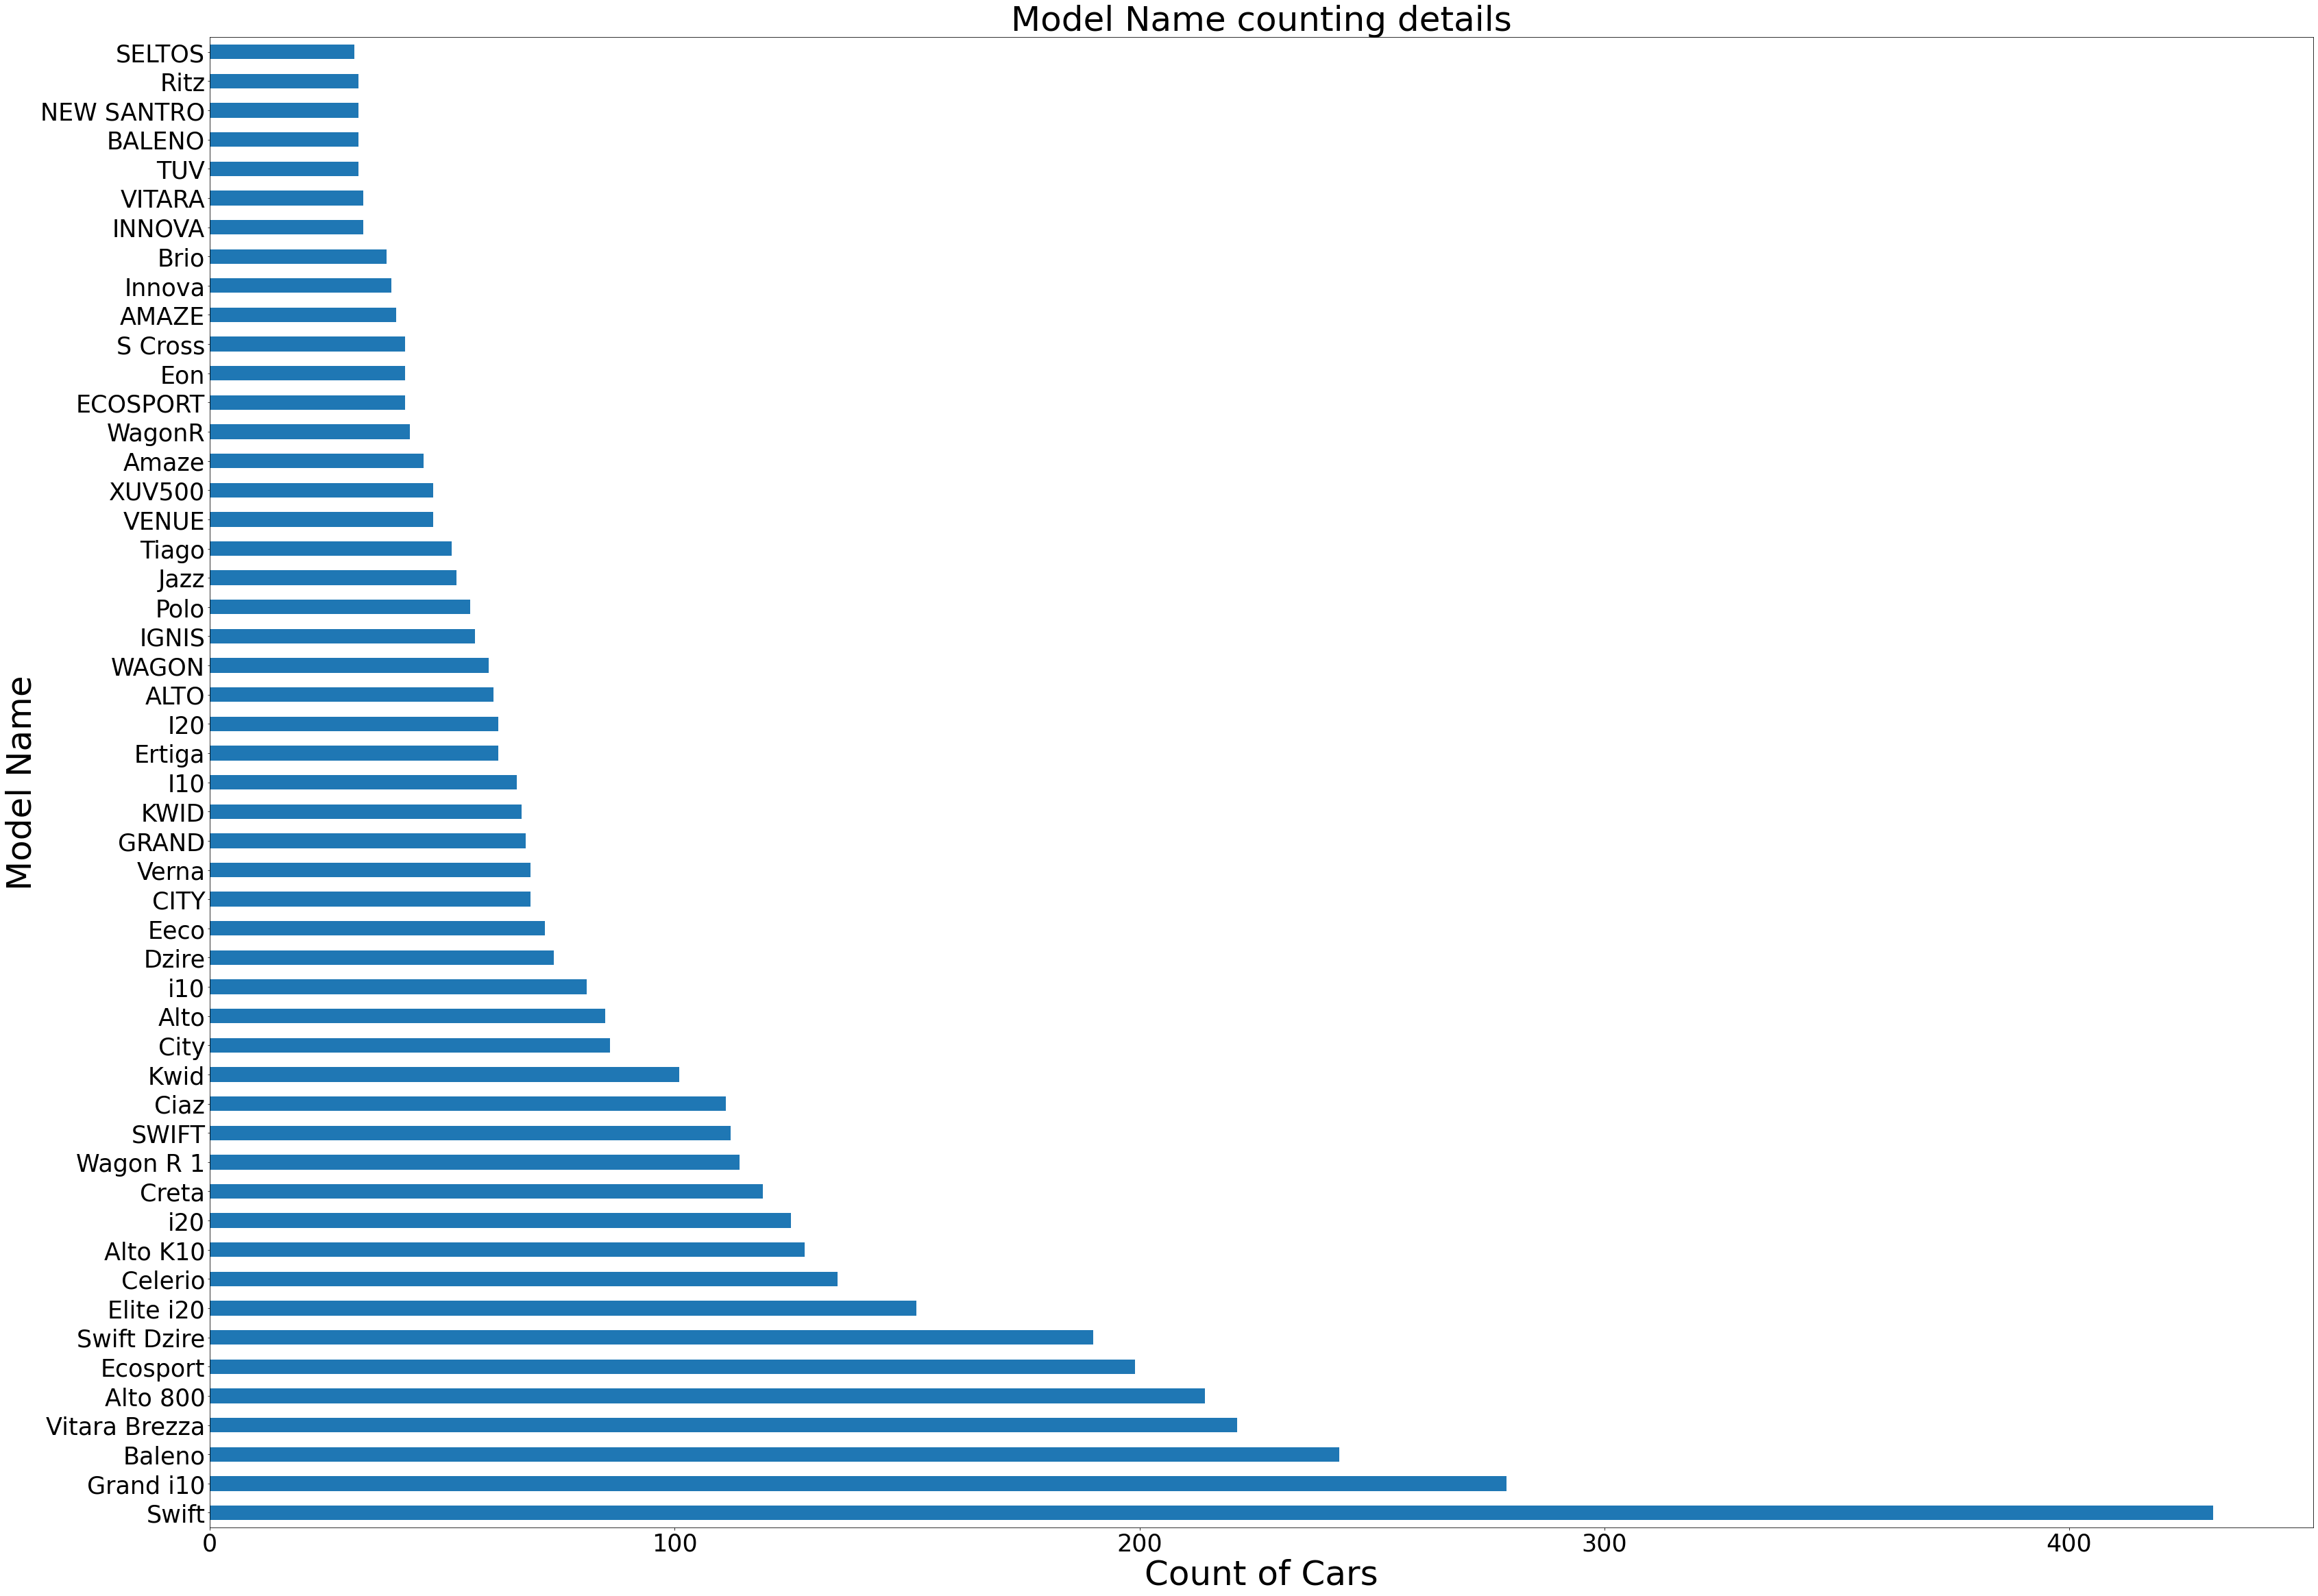

In [52]:
plt.figure(figsize=(55,40))
df["Model"].value_counts()[:51].plot(kind='barh')
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.xlabel("Count of Cars",fontsize = 50)
plt.ylabel("Model Name",fontsize =50)
plt.title('Model Name counting details',fontsize = 50)

In [53]:
#In this Visual we can see that the Car Type Swift belongs to Maruti is the most available Brand followed by grnd i10 from Hyundai.  

(array([0, 1, 2, 3]),
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Third Owner'),
  Text(3, 0, 'Fourth Owner')])

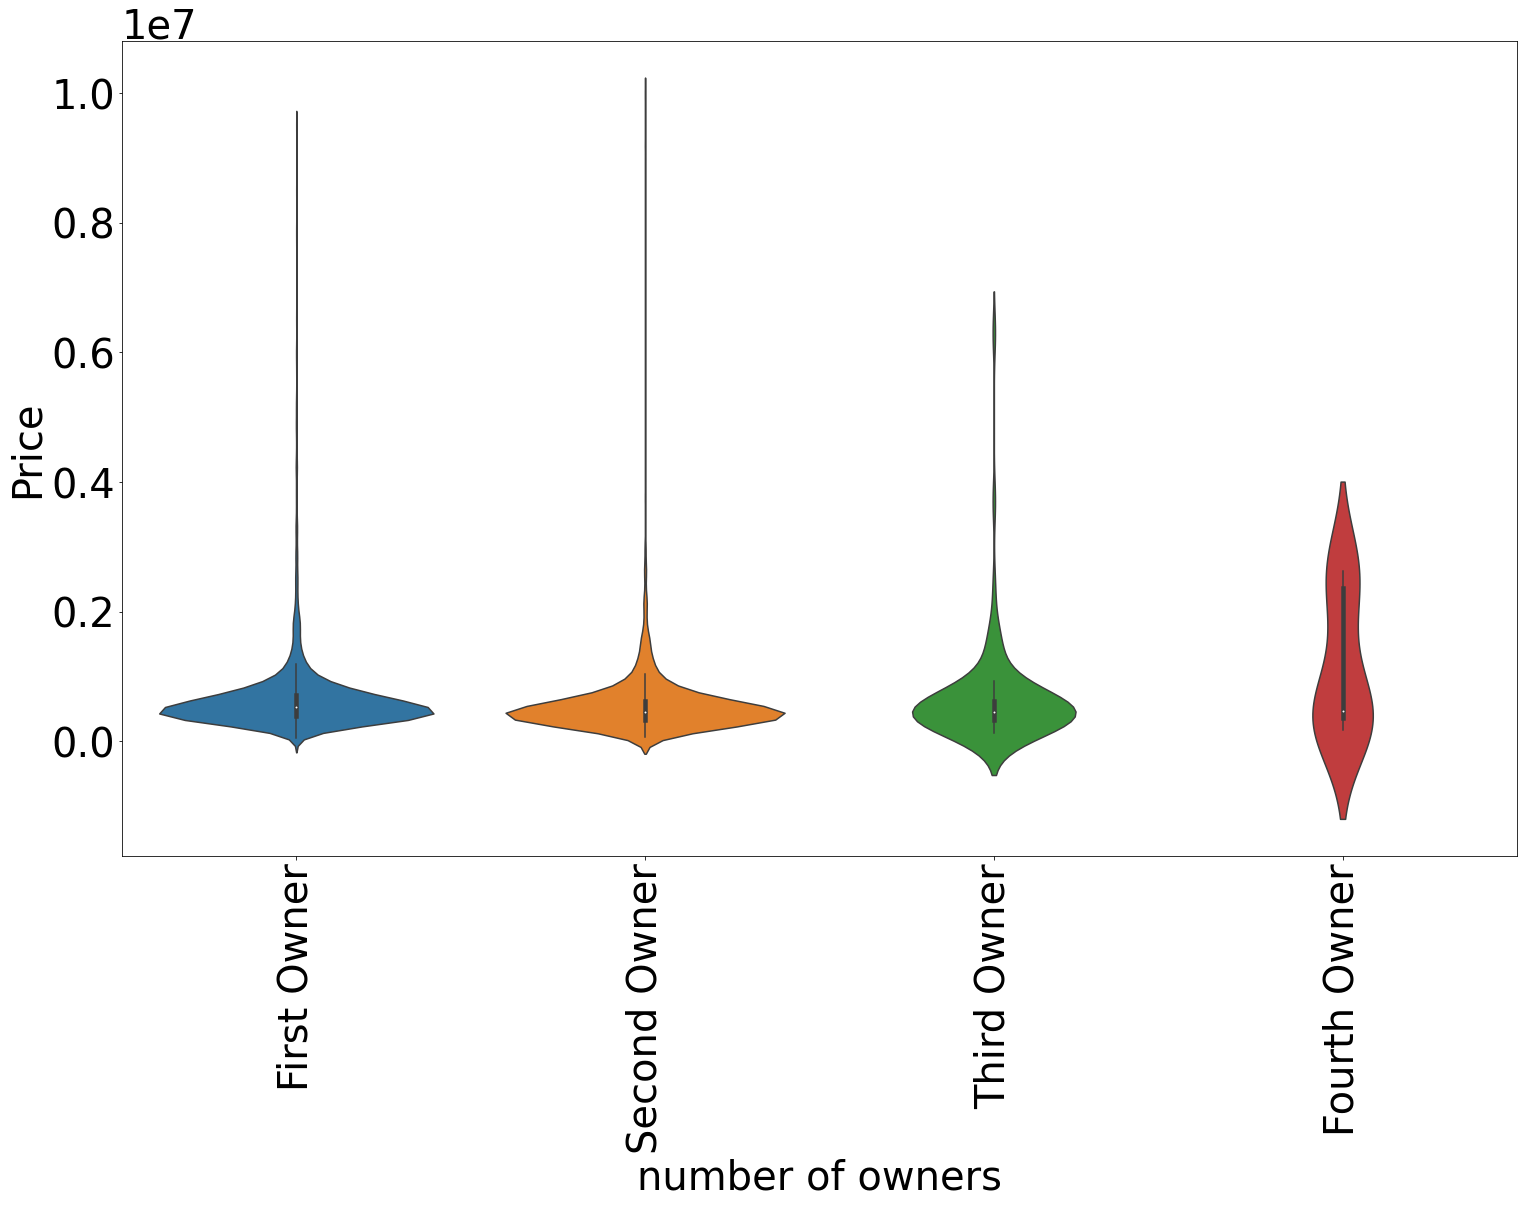

In [54]:
plt.figure(figsize=(25,15))
sns.violinplot(x=df['number of owners'],y=df['Price'])
plt.xticks(rotation=90)

<Figure size 2880x1800 with 0 Axes>

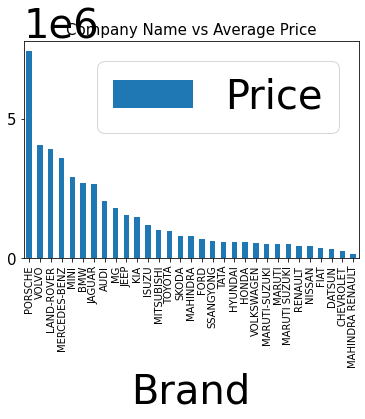

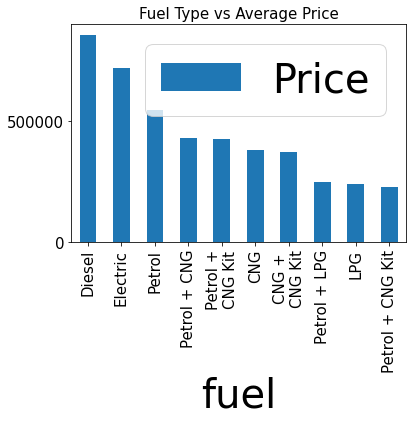

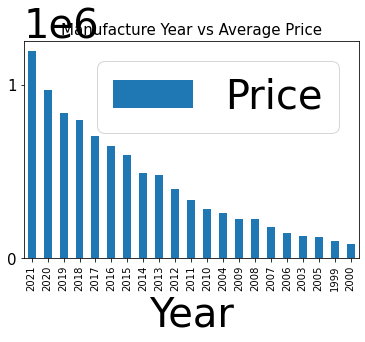

In [55]:
plt.figure(figsize=(40,25))

df7 = pd.DataFrame(df.groupby(['Brand'])['Price'].mean().sort_values(ascending = False))
df7.plot.bar()
plt.title('Company Name vs Average Price',fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.show()

df8 = pd.DataFrame(df.groupby(['fuel'])['Price'].mean().sort_values(ascending = False))
df8.plot.bar()
plt.title('Fuel Type vs Average Price',fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

df9 = pd.DataFrame(df.groupby(['Year'])['Price'].mean().sort_values(ascending = False))
df9.plot.bar()
plt.title('Manufacture Year vs Average Price', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=15)
plt.show()

In [56]:
#the Average Buying price of the Premium segment cars are high in comparison to other cars
#the Average Buying price of the Diesel cars are high in comparison to other cars.
#The averga ebuying price of the cars belongs to the Manufacturing year 2021 year in comparison to other cars belongs to the other Manufacturing years

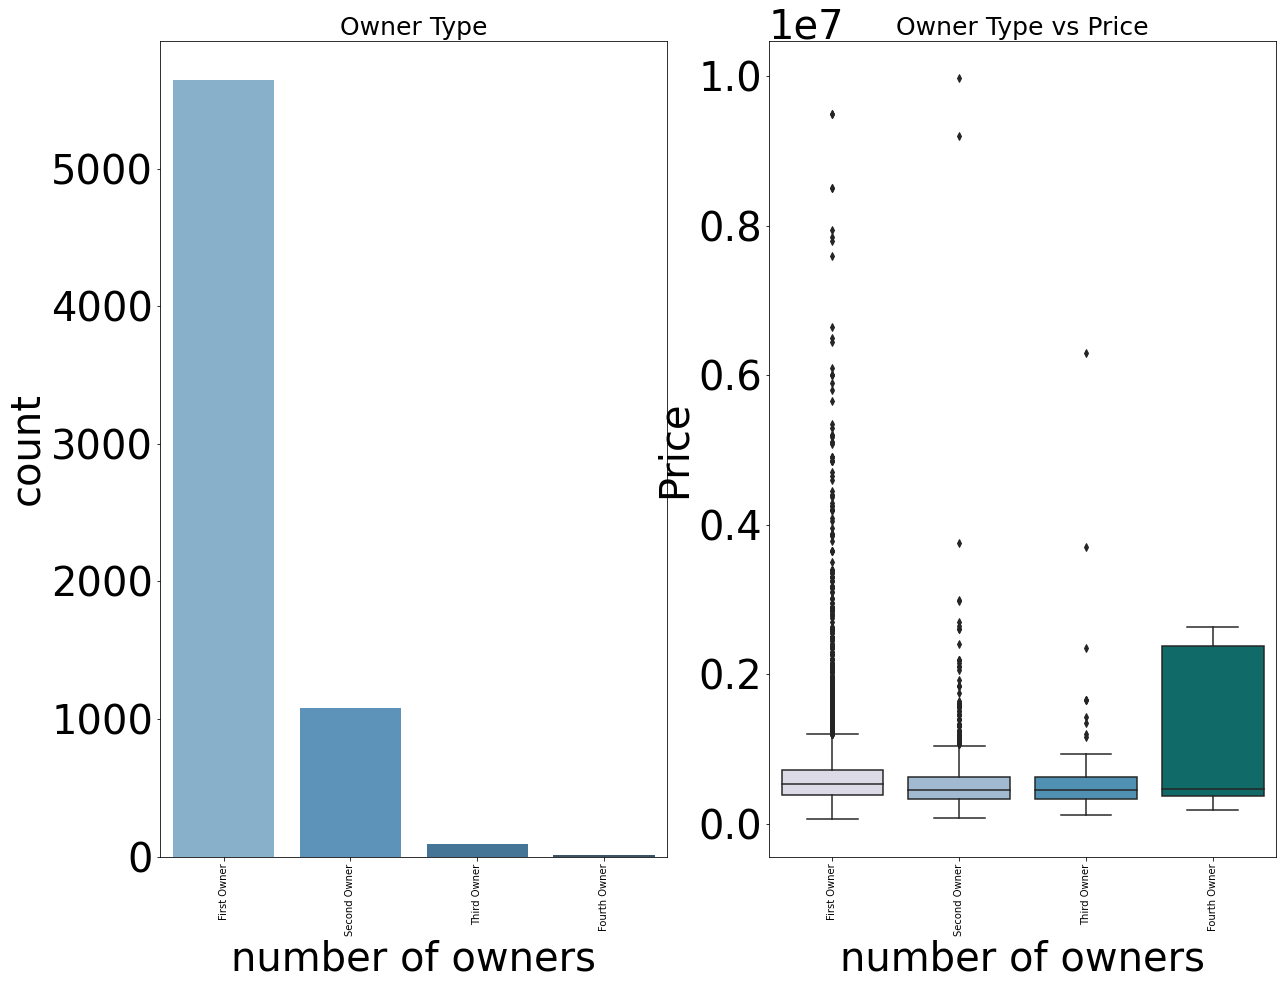

In [57]:
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
sns.countplot(df["number of owners"], palette=("Blues_d"))
plt.xticks(rotation=90,fontsize=10)
plt.title('Owner Type',fontsize=25)

plt.subplot(1,2,2)
sns.boxplot(x=df["number of owners"], y=df["Price"], palette=("PuBuGn"))
plt.title('Owner Type vs Price', fontsize=25)
plt.xticks(rotation=90,fontsize=10)

plt.show()

In [58]:
# As we can see that the numbers of used cars availabile in the market are belongs to the first owner Type. 

In [59]:
#Coverting object data in float/Integer by using label Encoding  
le=LabelEncoder()
df["Brand"]=le.fit_transform(df["Brand"].astype(str))
df["Model"]=le.fit_transform(df["Model"].astype(str))
df["Varient"]=le.fit_transform(df["Varient"].astype(str))
df["fuel"]=le.fit_transform(df["fuel"].astype(str))
df["number of owners"]=le.fit_transform(df["number of owners"].astype(str))
df["location"]=le.fit_transform(df["location"].astype(str))
df["Site"]=le.fit_transform(df["Site"].astype(str))

In [60]:
df.skew()

Brand                0.592776
Model                0.077392
Varient             -0.390982
Year                -0.719530
driven kilometers    1.391056
fuel                -0.566373
number of owners     1.833838
location            -0.378953
Price                6.387722
Site                 0.586025
dtype: float64

In [61]:
# We can see that the data is very little skewness except Price and no of owners. The data belongs to The Proce is highly Skewed. 

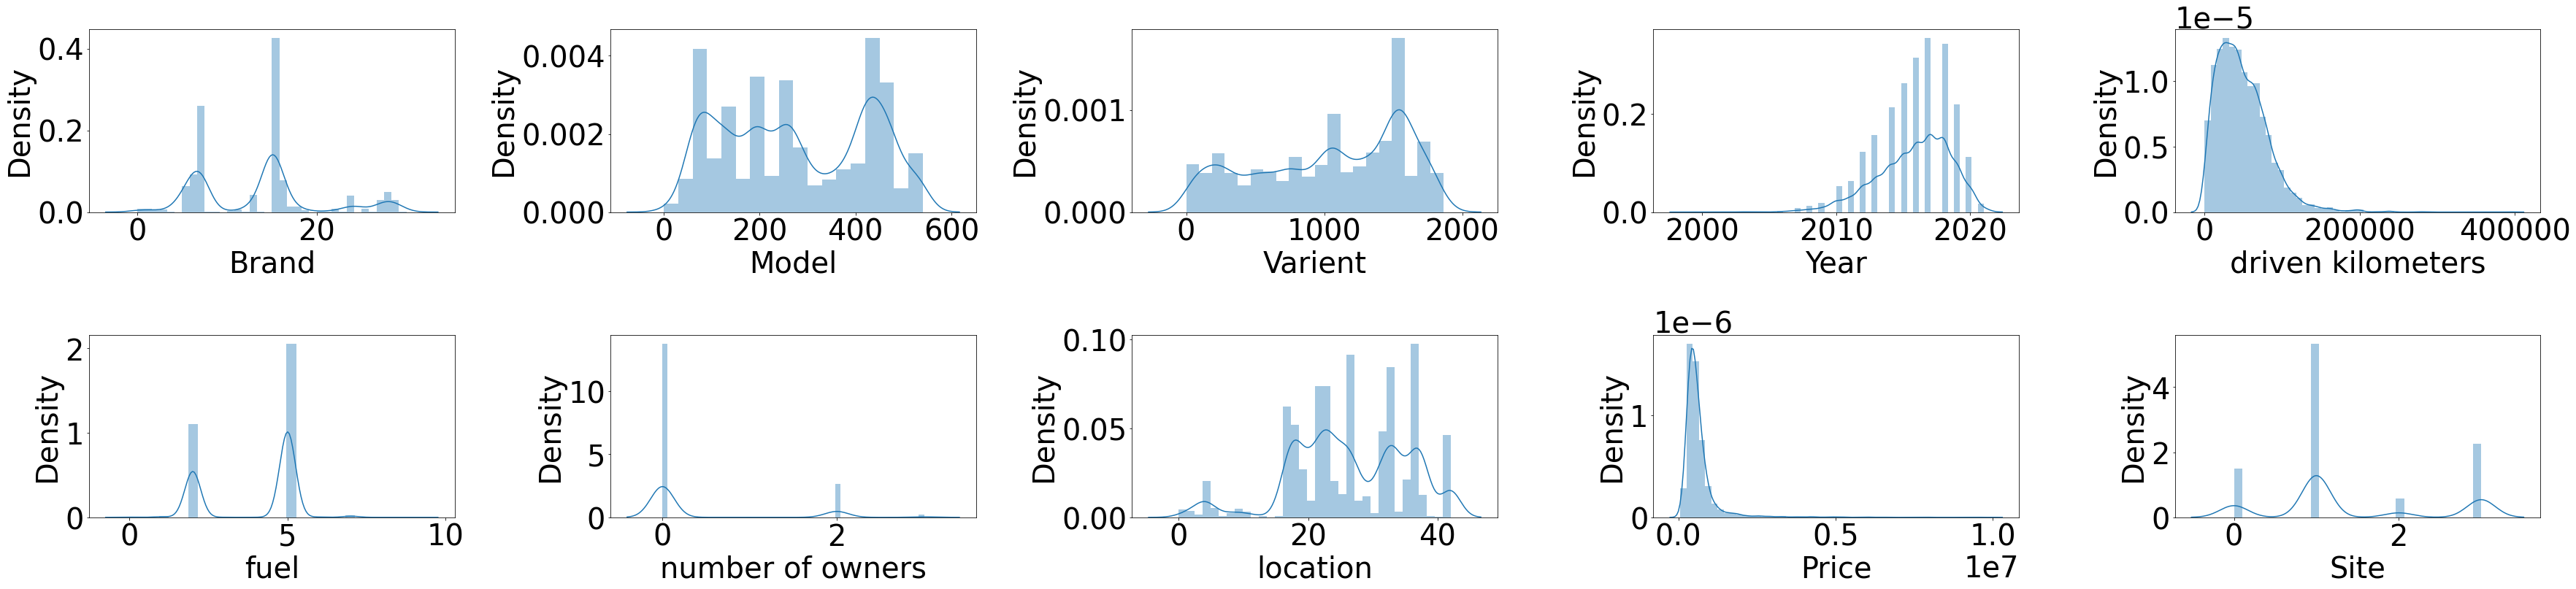

In [62]:
#Cheking Skewness
collist=df.columns.values
ncol=5
nrows=7
plt.figure(figsize=(50,40))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

In [63]:
#Removing Skewness
import numpy as np
skew=("Price","driven kilometers")
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

Brand                    AxesSubplot(0.125,0.71587;0.227941x0.16413)
Model                 AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Varient               AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Year                    AxesSubplot(0.125,0.518913;0.227941x0.16413)
driven kilometers    AxesSubplot(0.398529,0.518913;0.227941x0.16413)
fuel                 AxesSubplot(0.672059,0.518913;0.227941x0.16413)
number of owners        AxesSubplot(0.125,0.321957;0.227941x0.16413)
location             AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Price                AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Site                       AxesSubplot(0.125,0.125;0.227941x0.16413)
dtype: object

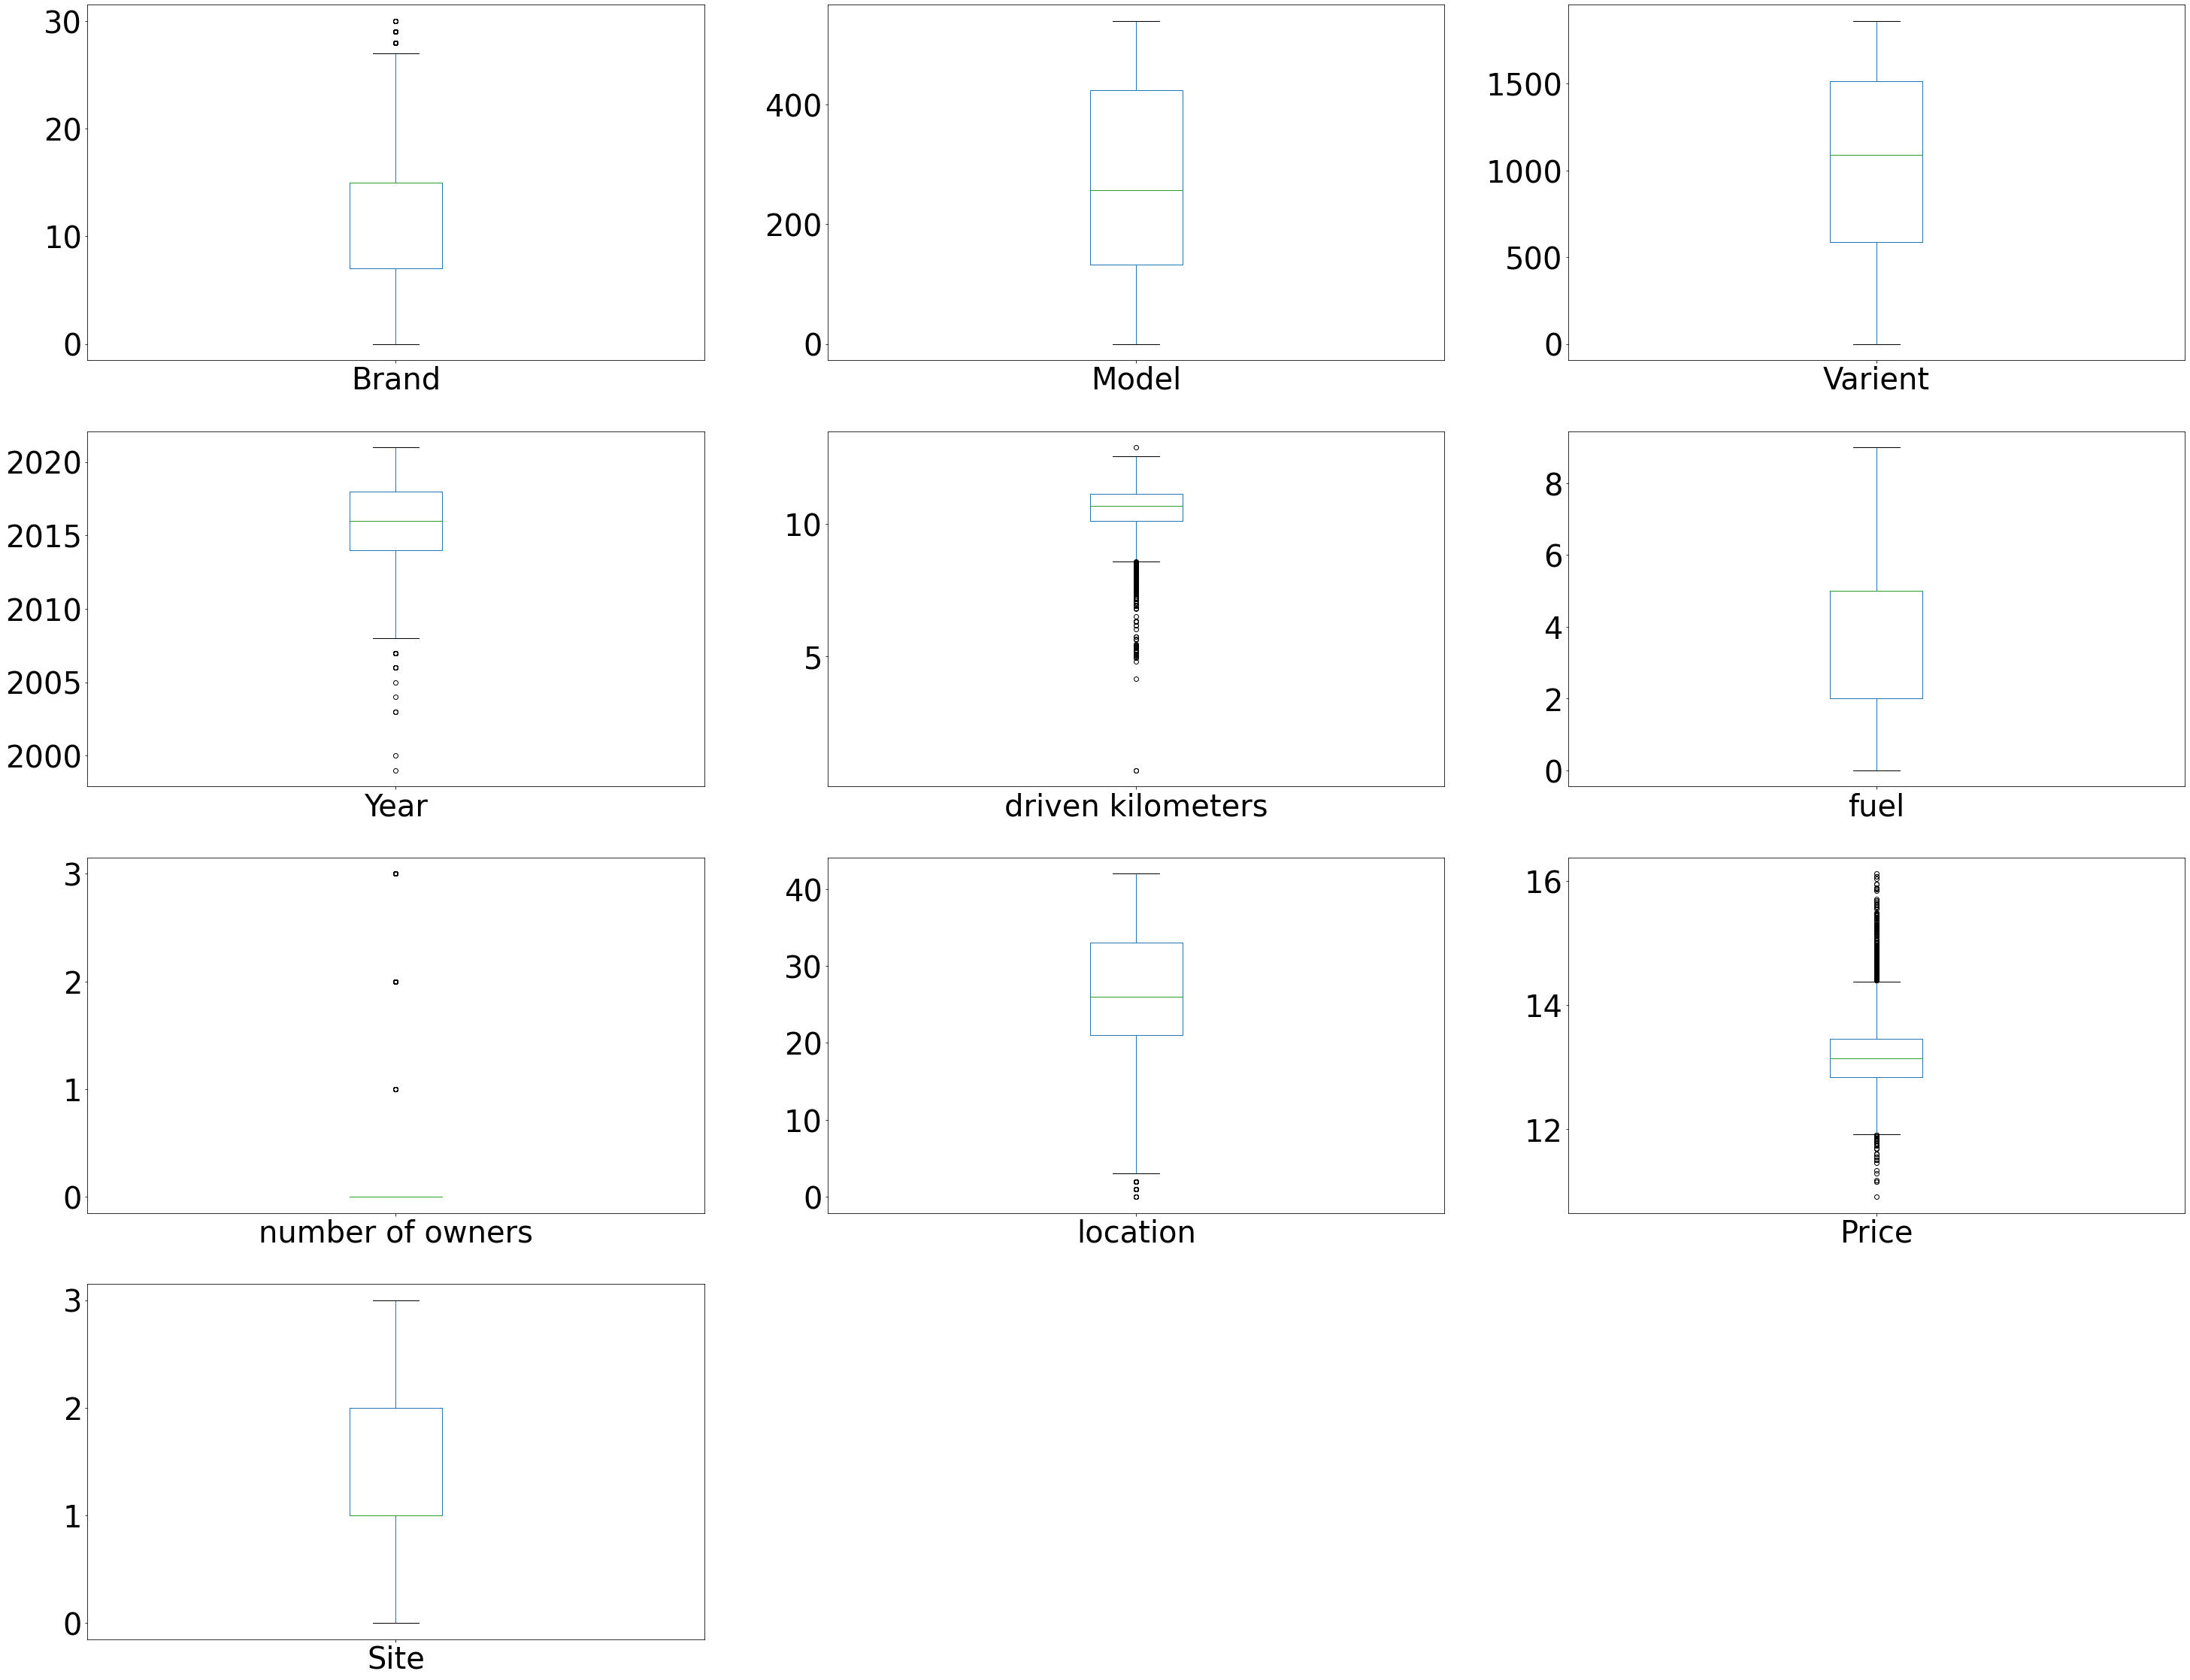

In [64]:
#Checking Outliers
df.plot(kind="box",subplots=True,layout=(4,3),figsize=(50,40))

In [65]:
#in this visual we can see that there are lot of outliers are present in the Location Data,Proce Data and Driven Kilometer Data

In [66]:
#Checking Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold=3
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([   4,   27,   33,   43,   60,  121,  157,  158,  170,  172,  272,
        448,  450,  491,  492,  493,  493,  500,  503,  518,  534,  546,
        546,  554,  575,  576,  577,  578,  587,  800,  806,  837,  838,
        851,  859,  870,  875,  912,  916,  929, 1050, 1052, 1054, 1074,
       1143, 1164, 1201, 1281, 1320, 1412, 1542, 1548, 1596, 1686, 1747,
       1759, 1806, 1811, 1818, 1821, 1905, 1909, 1934, 1937, 1938, 1943,
       1946, 1947, 1954, 1954, 1956, 1976, 1984, 1985, 2027, 2029, 2103,
       2133, 2189, 2193, 2247, 2255, 2317, 2361, 2362, 2370, 2440, 2447,
       2448, 2449, 2450, 2451, 2458, 2482, 2516, 2524, 2585, 2626, 2643,
       2655, 2673, 2678, 2681, 2717, 2723, 2724, 2725, 2732, 2736, 2737,
       2738, 2739, 2741, 2742, 2745, 2749, 2752, 2755, 2757, 2765, 2766,
       2768, 2774, 2775, 2776, 2783, 2790, 2794, 2796, 2797, 2798, 2800,
       2802, 2803, 2804, 2807, 2810, 2813, 2814, 2815, 2821, 2822, 2830,
       2831, 2833, 2833, 2834, 2835, 2839, 2840, 2

In [67]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
zthreshold=3
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([  62,   76,  111,  113,  119,  478,  491,  507,  510,  525,  528,
        553,  668,  692,  748,  828,  828,  853,  854,  855, 1003, 1106,
       1107, 1107, 1110, 1440, 1473, 1522, 1545, 1573, 1689, 1690, 1753,
       1754, 1762, 1777, 1777, 1786, 1791, 1792, 1793, 1797, 1804, 1811,
       1848, 1851, 1924, 1956, 1966, 2058, 2067, 2091, 2110, 2197, 2218,
       2228, 2229, 2266, 2282, 2282, 2292, 2293, 2294, 2296, 2322, 2355,
       2364, 2421, 2462, 2474, 2479, 2497, 2506, 2530, 2551, 2552, 2554,
       2577, 2617, 2629, 2632, 2638, 2643, 2645, 2666, 2668, 2690, 2691,
       2699, 2699, 2705, 2707, 2714, 2716, 2718, 2733, 2747, 2852, 2856,
       2950, 3086, 3135, 3169, 3218, 3293, 3329, 3458, 3508, 3537, 3689,
       3724, 3734, 3740, 3806, 3831, 3976, 4006, 4102, 4186, 4257, 4307,
       4337, 4489, 4524, 4534, 4540, 4605, 4630, 4687, 4717, 4869, 4904,
       4914, 4920, 4985, 5010, 5072, 5147, 5183, 5313, 5408, 5544, 5593,
       5628, 5735, 5896, 5899, 5913, 6093, 6139, 6

In [68]:
#Checking the current shape of the DATA
df.shape

(6366, 10)

# MODELLING THE DATA

In [69]:
y=df["Price"]

In [70]:
y

0       11.856522
1       13.102163
2       12.429220
3       12.371591
5       13.517106
          ...    
6818    13.031344
6819    13.309175
6820    13.170201
6821    13.584335
6822    13.169056
Name: Price, Length: 6366, dtype: float64

In [71]:
x=df.copy()

In [72]:
x

,Brand,Model,Varient,Year,driven kilometers,fuel,number of owners,location,Price,Site
0,13,515,824,2011,11.993993,2,0,17,11.856522,0
1,7,533,594,2015,11.012116,2,0,17,13.102163,0
2,15,424,814,2012,12.184047,2,2,17,12.429220,0
3,7,533,176,2012,11.890094,2,0,17,12.371591,0
5,6,133,1855,2017,11.156436,2,0,17,13.517106,0
...,...,...,...,...,...,...,...,...,...,...
6818,5,230,215,2017,10.916723,2,0,17,13.031344,1
6819,7,534,96,2016,9.399224,5,0,17,13.309175,1
6820,15,425,1488,2017,10.883504,2,0,17,13.170201,1
6821,7,148,278,2016,11.458575,2,0,17,13.584335,1


In [73]:
x.drop("Price",axis=1,inplace=True)

In [74]:
#Checking the shape of x and y data
x.shape,y.shape

((6366, 9), (6366,))

In [75]:
x

,Brand,Model,Varient,Year,driven kilometers,fuel,number of owners,location,Site
0,13,515,824,2011,11.993993,2,0,17,0
1,7,533,594,2015,11.012116,2,0,17,0
2,15,424,814,2012,12.184047,2,2,17,0
3,7,533,176,2012,11.890094,2,0,17,0
5,6,133,1855,2017,11.156436,2,0,17,0
...,...,...,...,...,...,...,...,...,...
6818,5,230,215,2017,10.916723,2,0,17,1
6819,7,534,96,2016,9.399224,5,0,17,1
6820,15,425,1488,2017,10.883504,2,0,17,1
6821,7,148,278,2016,11.458575,2,0,17,1


In [76]:
#Using Power Transformation for standardization for the Data
from sklearn.preprocessing import power_transform
x_t=power_transform(x,method='yeo-johnson')

In [77]:
x_t=pd.DataFrame(data=x_t)

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.33,random_state=42)

In [79]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4265, 9), (2101, 9), (4265,), (2101,))

In [80]:
#using Linear Regression
lm=LinearRegression()

In [81]:
lm.fit(x_train,y_train)

LinearRegression()

In [82]:
lm.coef_

array([-0.05308129,  0.03115172, -0.04734775,  0.27726662,  0.03027028,
       -0.14666809,  0.00710784,  0.00309393,  0.05420347])

In [83]:
lm.score(x_train,y_train)

0.4331435949626783

In [84]:
pred=lm.predict(x_test)
print("predict result price",pred)
print("actual price",y_test)

predict result price [12.74520483 13.3051042  13.45098596 ... 13.30169185 13.24376621
 13.705104  ]
actual price 6404    12.406152
232     12.895465
5731    13.722847
516     13.710151
4090    13.122563
          ...    
3148    14.377865
6499    14.465959
787     12.611541
210     13.296318
3790    13.597106
Name: Price, Length: 2101, dtype: float64


In [85]:
print("error:")

print("mean absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 0.2692439290151882
mean squared error: 0.12708129331483808
root mean squared error: 0.3564846326489237


In [86]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.40056362940865853


0.4331431020705133
[-0.05297951  0.03102422 -0.04727293  0.27703364  0.03008411 -0.14665093
  0.00699254  0.00298613  0.05407512]


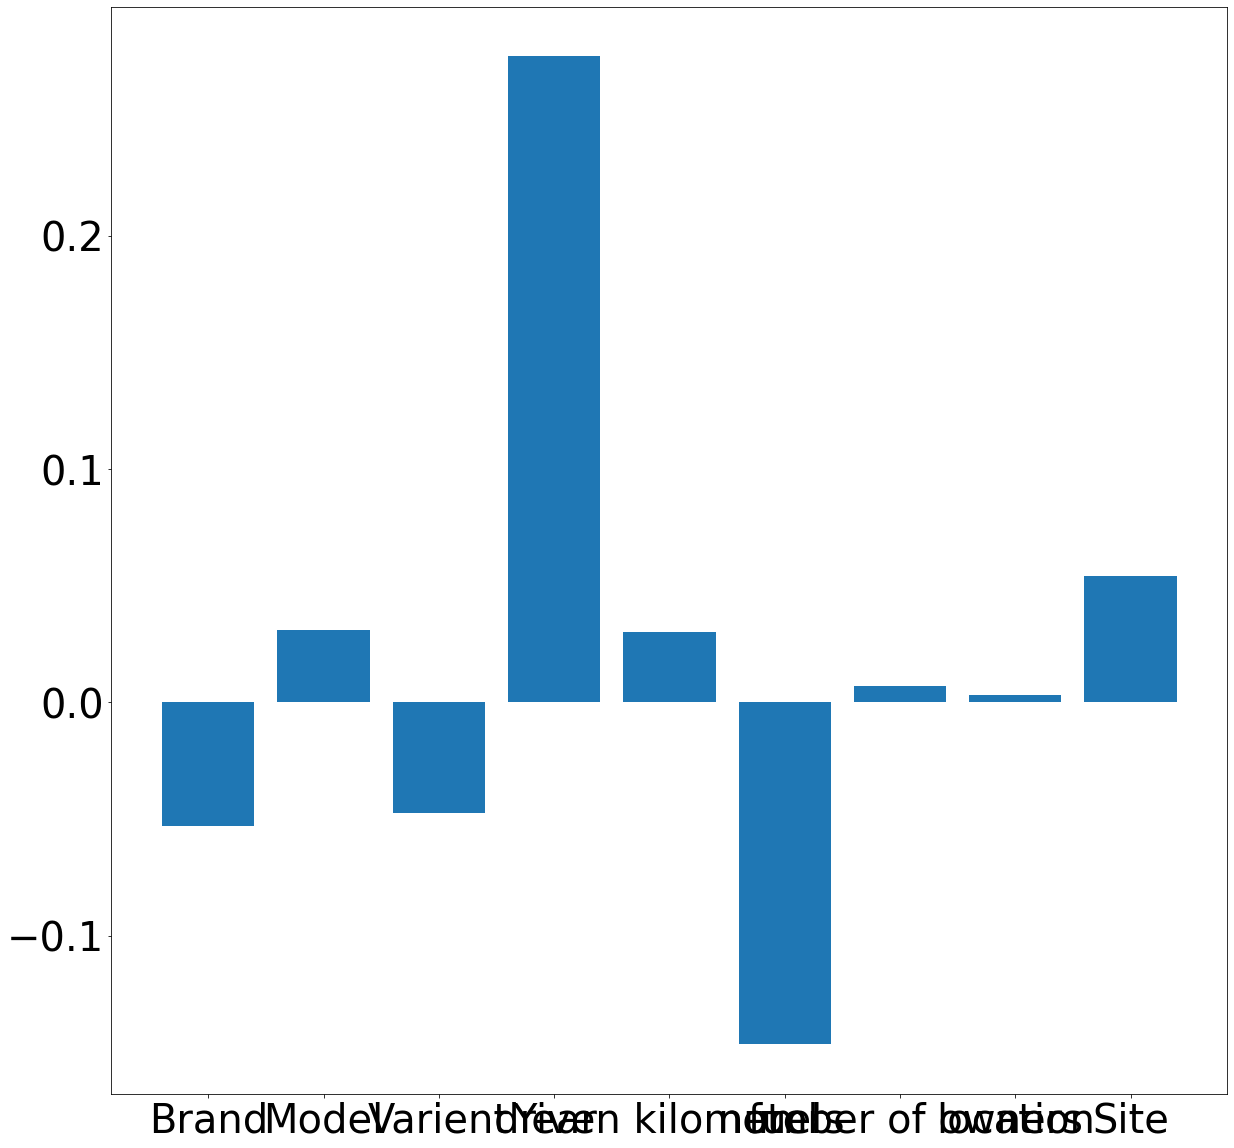

In [87]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print(ls.coef_)
plt.figure(figsize=(20,20))
plt.bar(x.columns,ls.coef_)
plt.show()

0.43314344650639014
[-0.05302628  0.03108553 -0.04731033  0.27712788  0.03016647 -0.14665518
  0.00704746  0.00303972  0.05413331]


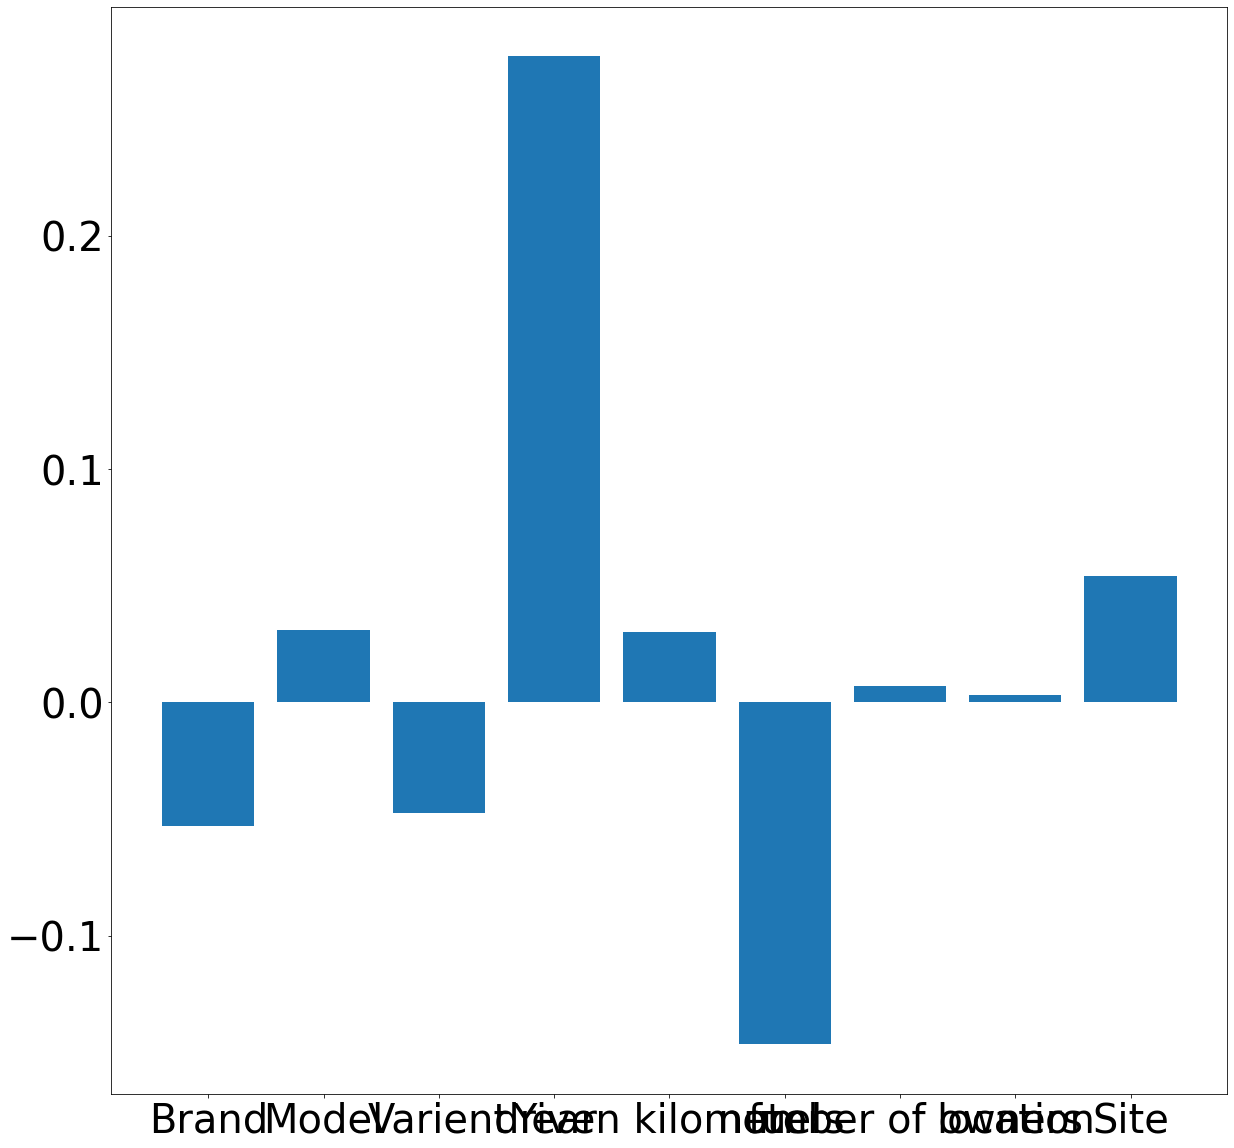

In [88]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
print(enr.coef_)
plt.figure(figsize=(20,20))
plt.bar(x.columns,enr.coef_)
plt.show()

# Checking DATA from differnet Regression Technique to find out the best model

In [89]:
from sklearn.svm import SVR
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.svm import SVR

In [91]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print("DTC SCORE:",dtc.score(x_train,y_train))

dtcpredict=dtc.predict(x_test)
print("dtc r2_score:",r2_score(y_test,dtcpredict))
print("mean squared error of DTC:",mean_squared_error(y_test,dtcpredict))
print("root mean squared error of DTC:",np.sqrt(mean_squared_error(y_test,dtcpredict)))

DTC SCORE: 0.9999542578408388
dtc r2_score: 0.6847030380446752
mean squared error of DTC: 0.06684336765217415
root mean squared error of DTC: 0.2585408432959368


In [92]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print("KNR SCORE:",knr.score(x_train,y_train))

knrpredict=knr.predict(x_test)
print("knr r2_score:",r2_score(y_test,knrpredict))
print("mean squared error of KNN:",mean_squared_error(y_test,knrpredict))
print("root mean squared error of KNN:",np.sqrt(mean_squared_error(y_test,knrpredict)))

KNR SCORE: 0.7375354403764363
knr r2_score: 0.5666877402826489
mean squared error of KNN: 0.0918627648831747
root mean squared error of KNN: 0.30308870794401876


In [93]:
svr1=SVR()
svr1.fit(x_train,y_train)
print("SVR1 SCORE:",svr1.score(x_train,y_train))

svr1predict=svr1.predict(x_test)
print("SVR r2_score:",r2_score(y_test,svr1predict))
print("mean squared error of SVR:",mean_squared_error(y_test,svr1predict))
print("root mean squared error of SVR:",np.sqrt(mean_squared_error(y_test,svr1predict)))

SVR1 SCORE: 0.7067164340167339
SVR r2_score: 0.5924679846396914
mean squared error of SVR: 0.08639731941540375
root mean squared error of SVR: 0.29393420933161857


In [94]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(predrf)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predrf))

[12.43915885 12.94998901 13.68087207 ... 13.29456073 13.19360866
 13.57556207]
rf score: 0.9770174282623806
rf r2 score: 0.8362639640586256


In [95]:
from sklearn.ensemble import AdaBoostRegressor
#AdaBoostRegressor(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostRegressor(n_estimators=50,random_state=42)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(predad)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predad))

[12.98712096 13.46467661 13.51134459 ... 13.32703674 13.27560352
 13.55683865]
rf score: 0.9770174282623806
rf r2 score: 0.41244519045932837


In [96]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(predgb)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predgb))

[12.65082067 13.24440178 13.582569   ... 13.20852088 13.27455135
 13.57998145]
rf score: 0.9770174282623806
rf r2 score: 0.7411803815790892


In [97]:
pred=rf.predict(x_test)
print("predict result price",pred)
print("actual price",y_test)

predict result price [12.43915885 12.94998901 13.68087207 ... 13.29456073 13.19360866
 13.57556207]
actual price 6404    12.406152
232     12.895465
5731    13.722847
516     13.710151
4090    13.122563
          ...    
3148    14.377865
6499    14.465959
787     12.611541
210     13.296318
3790    13.597106
Name: Price, Length: 2101, dtype: float64


In [98]:
#So we can see that the RandomforestRegressor is providing the best result (97.70%) with the best r2 score (84%). 

Text(0, 0.5, 'predict_Price')

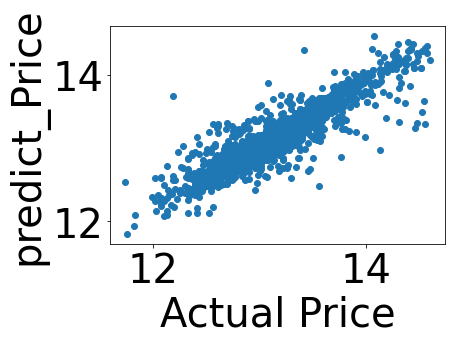

In [99]:
plt.scatter(x=y_test,y=predrf)
plt.xlabel("Actual Price")
plt.ylabel("predict_Price")

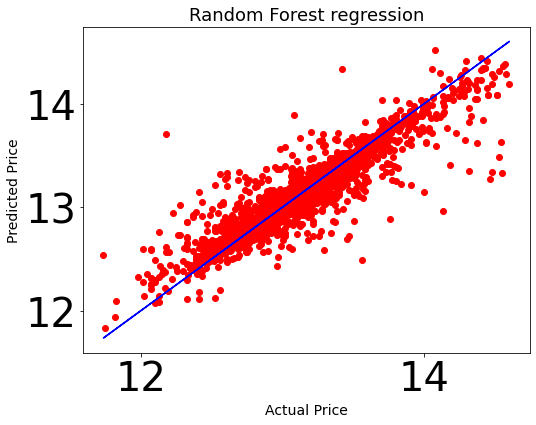

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predrf, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Random Forest regression',fontsize=18)
plt.show()

In [101]:
#Saving the Model
import pickle
filename='Used_car1.pkl'
pickle.dump(rf,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([12.43915885, 12.94998901, 13.68087207, ..., 13.29456073,
       13.19360866, 13.57556207])